In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plo

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
hr=pd.read_excel(r"C:\Users\91980\OneDrive\Desktop\FlipRobo\24 April Project Deadline\HR Analytics.xlsx")
hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [4]:
hr.shape    # 1470 rows and 35 columns

(1470, 35)

In [5]:
hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

Attrition is the target Variable.So, we have to analyze this data according to attrition.

In [6]:
#Droping some of the columns that are no use of Attrition prediction

hr=hr.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','StockOptionLevel'],axis=1)
hr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4  

We have two types of data Numerical and Categorical.First we will categorise both data.

In [7]:
categorical_hr=hr.select_dtypes(include='object')
numerical_hr=hr.select_dtypes(exclude='object')

# EDA

                                             |                                             | [  0%]   00:00 ->…


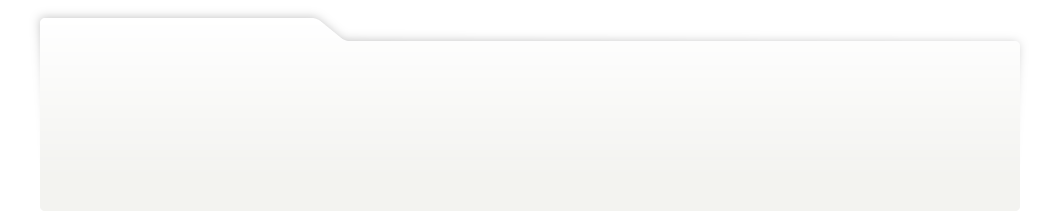
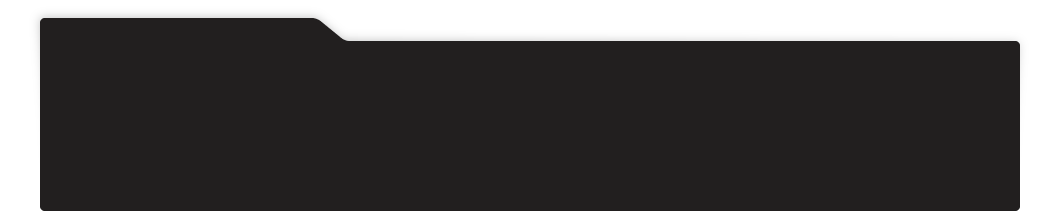
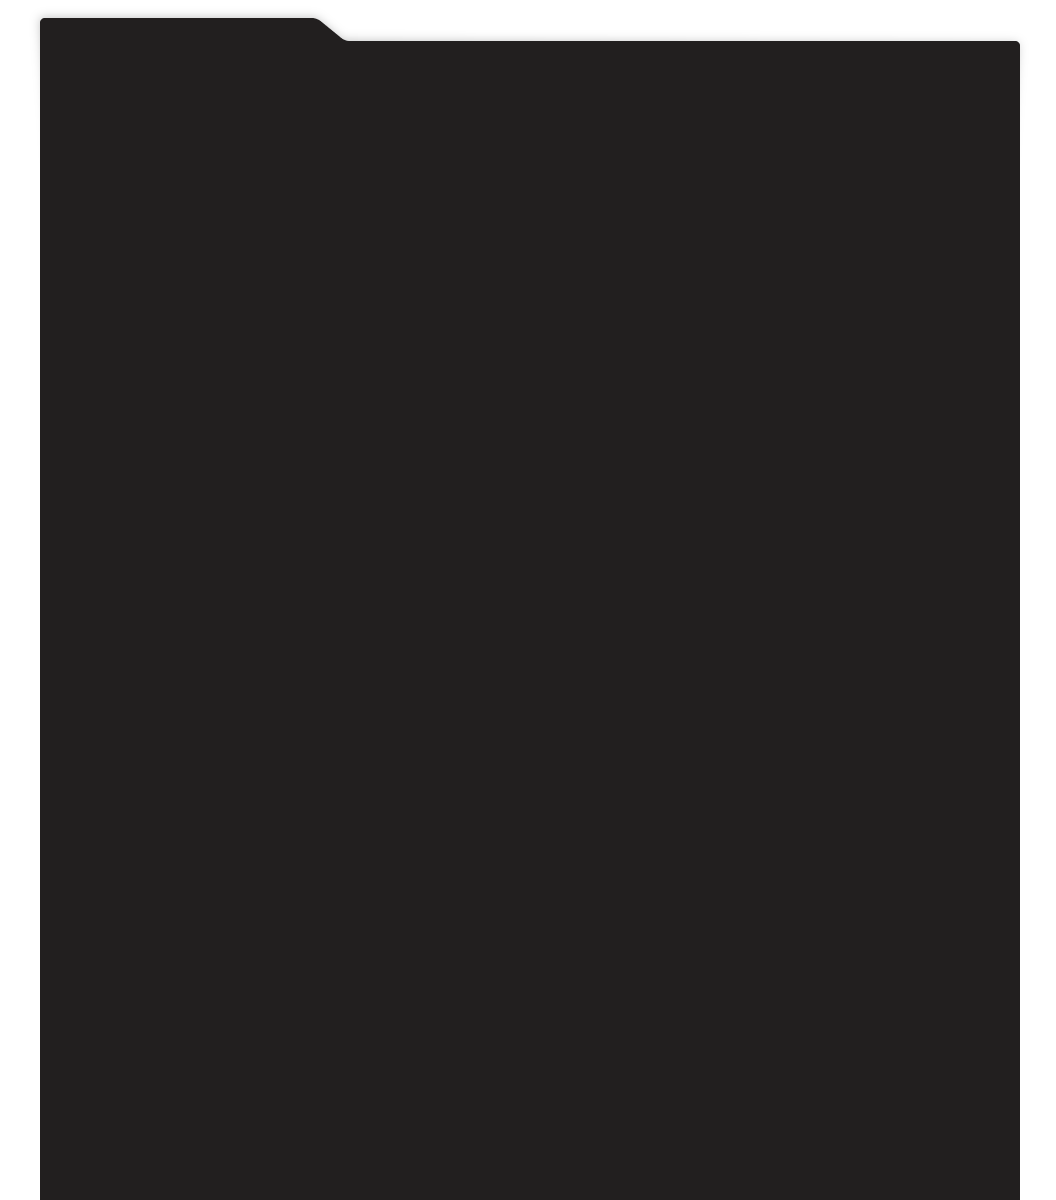
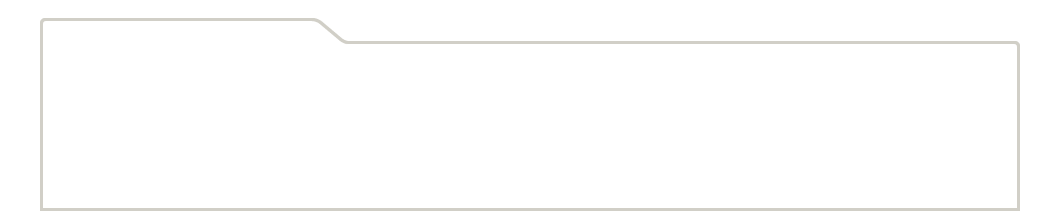
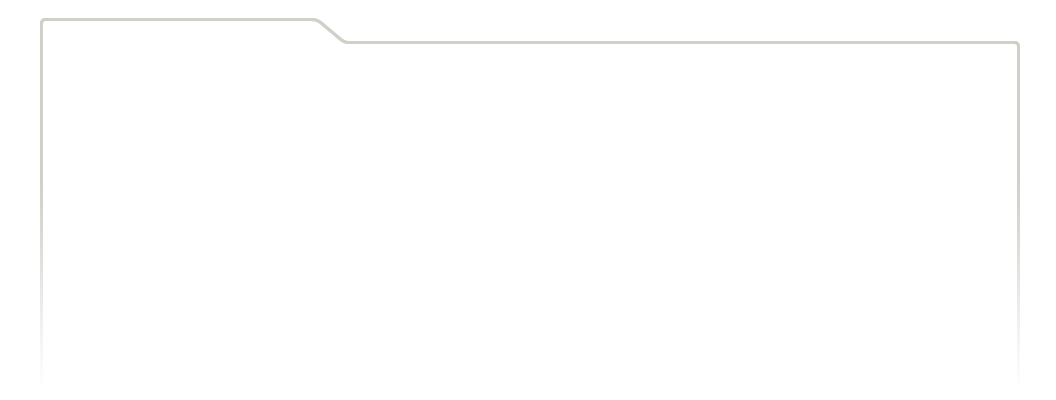
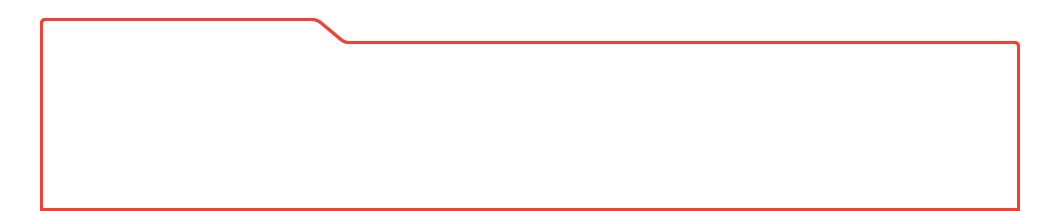
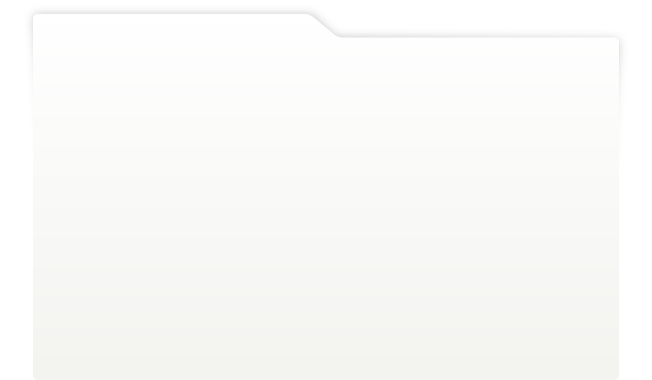
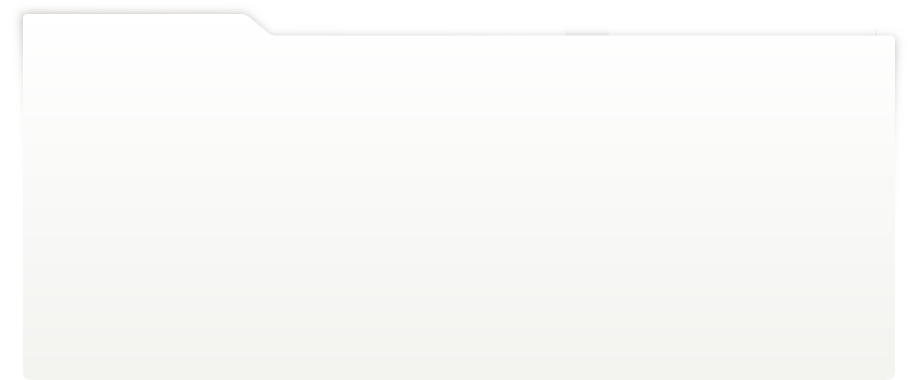
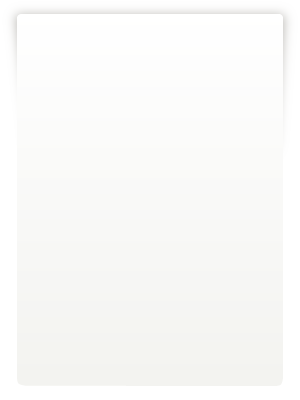
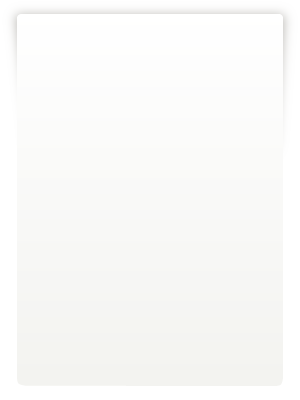
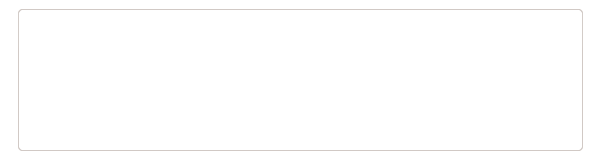
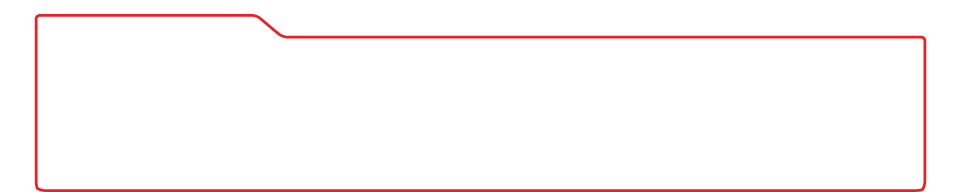
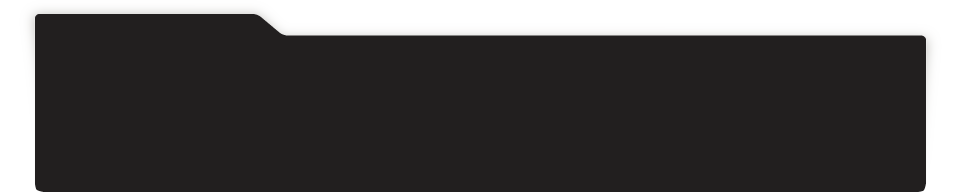
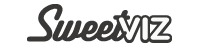
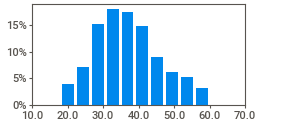
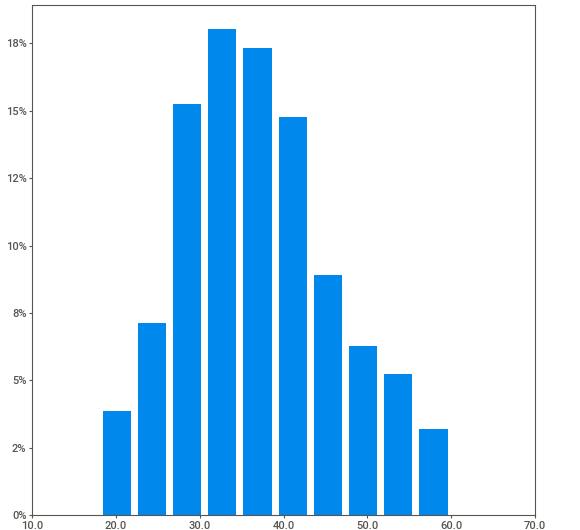
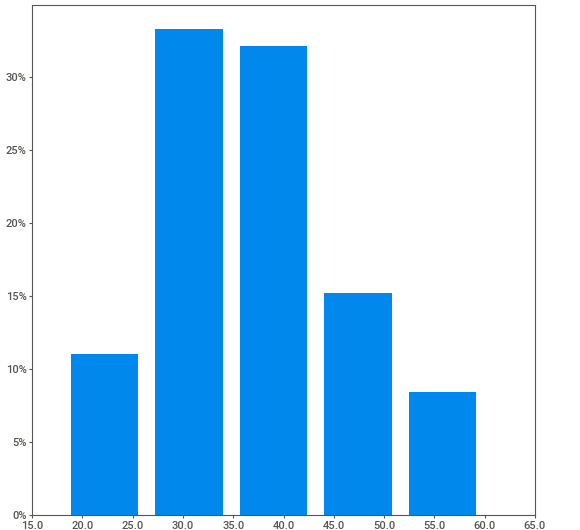
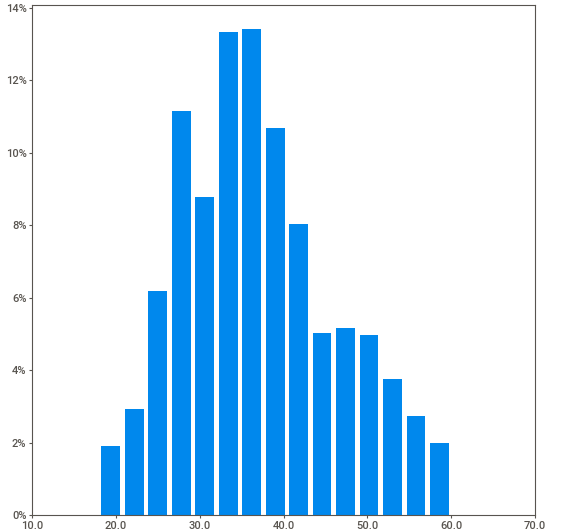
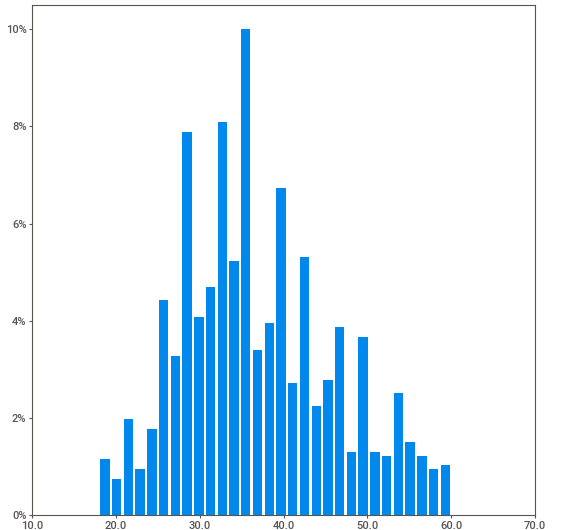
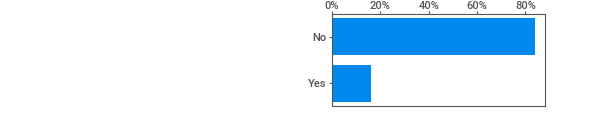
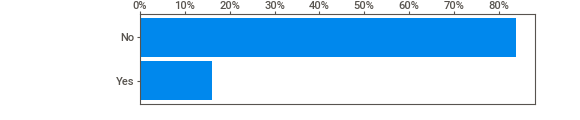
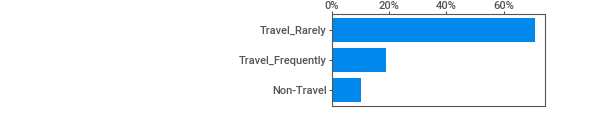
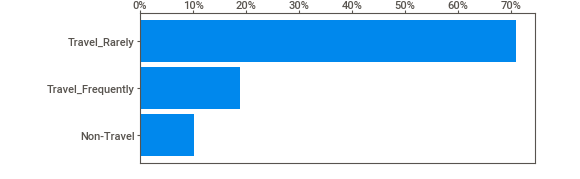
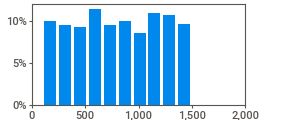
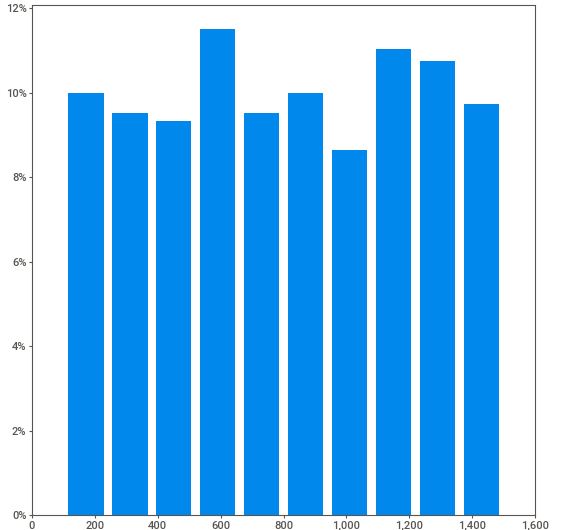
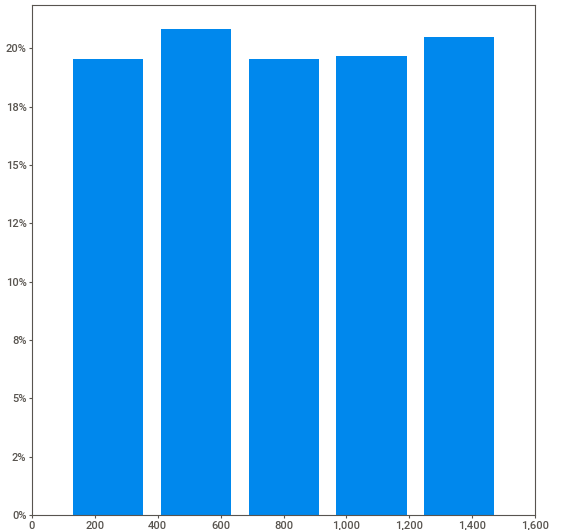
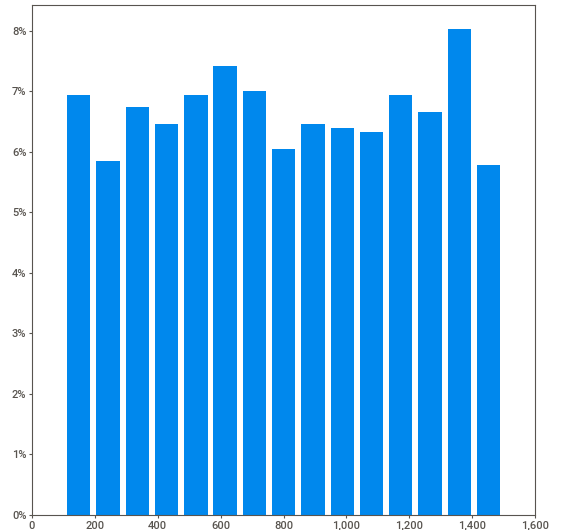
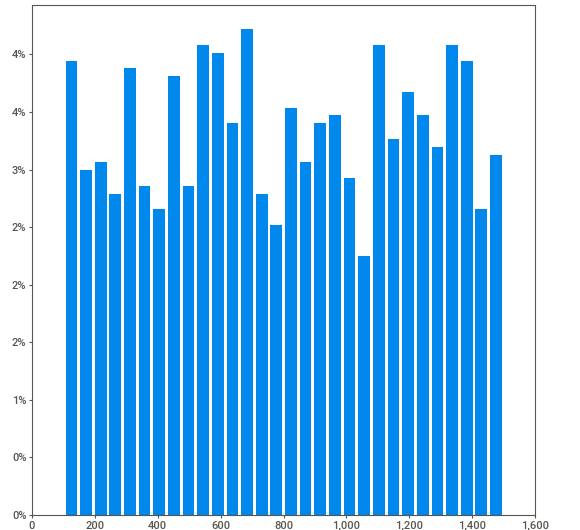
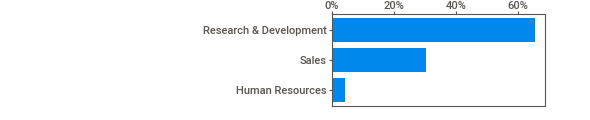
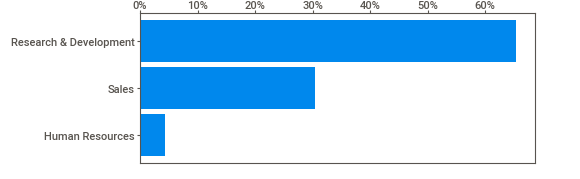
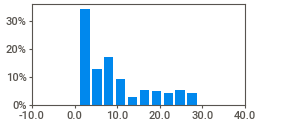
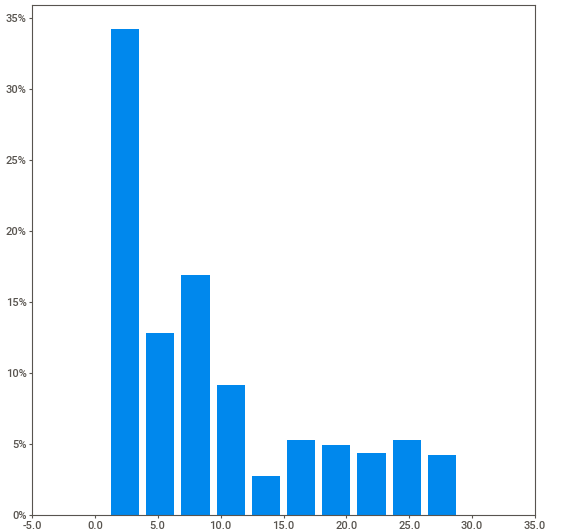
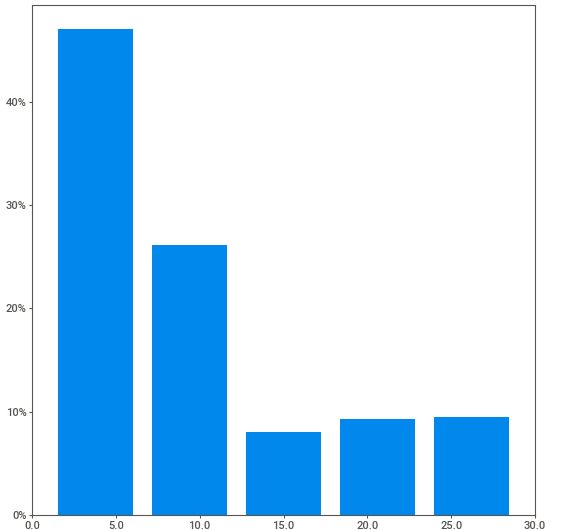
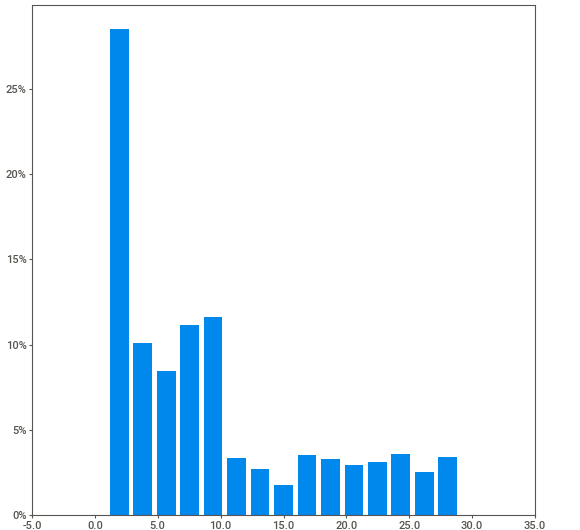
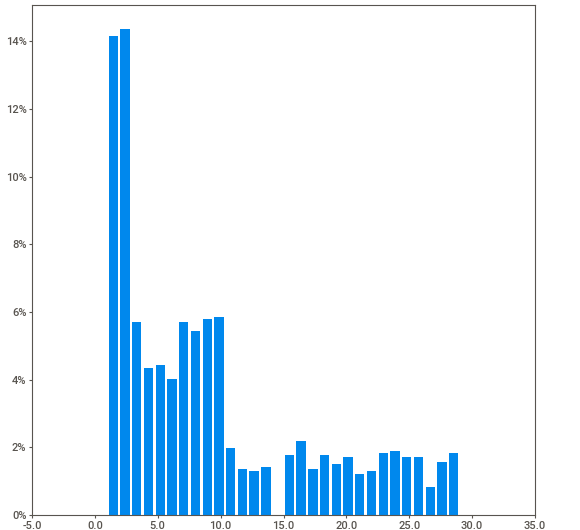
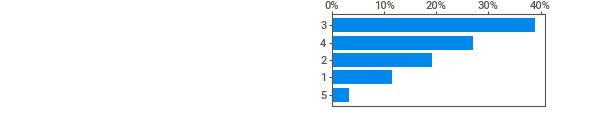
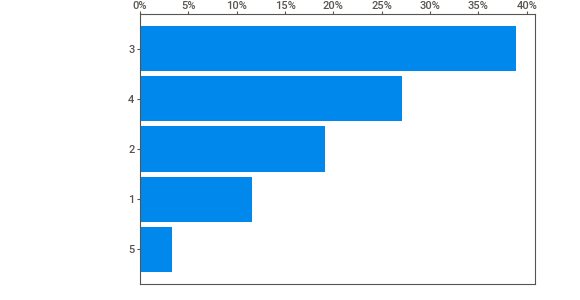
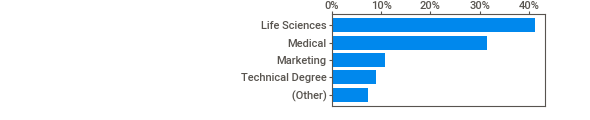
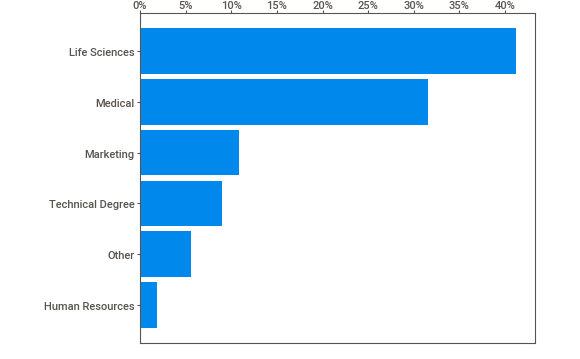
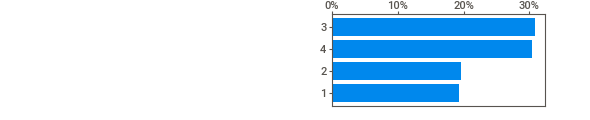
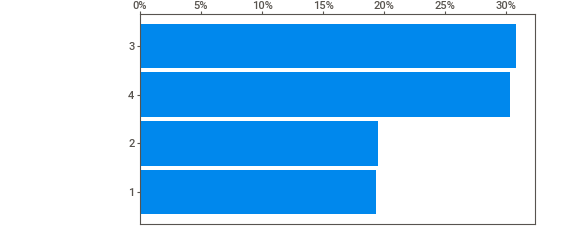
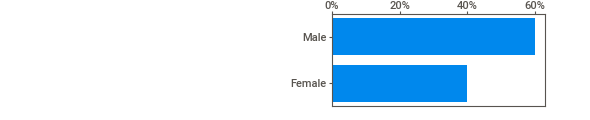
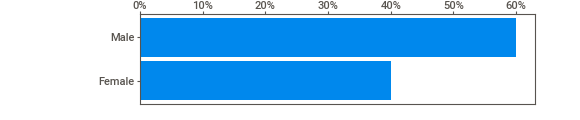
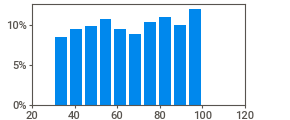
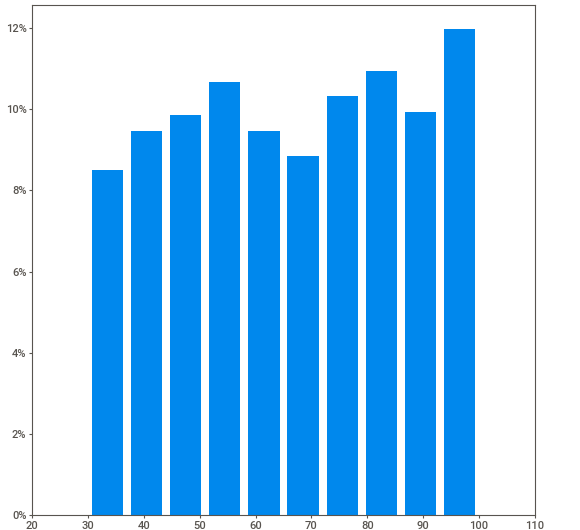
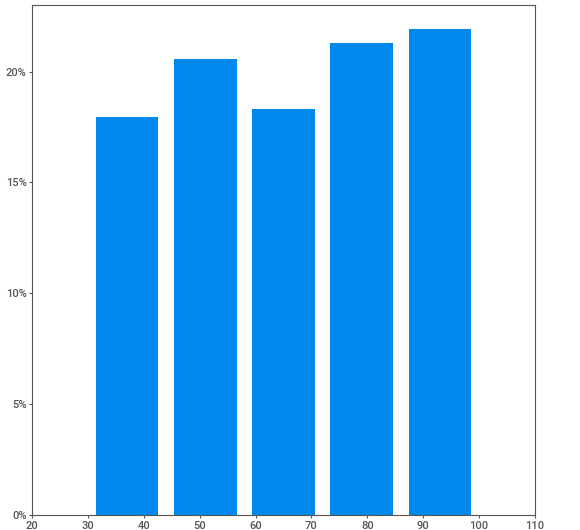
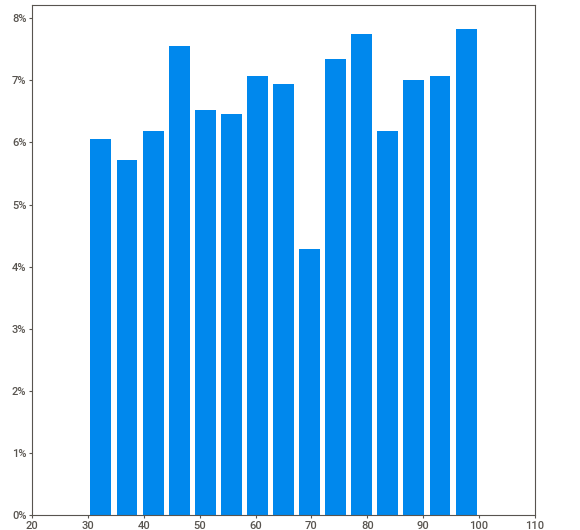
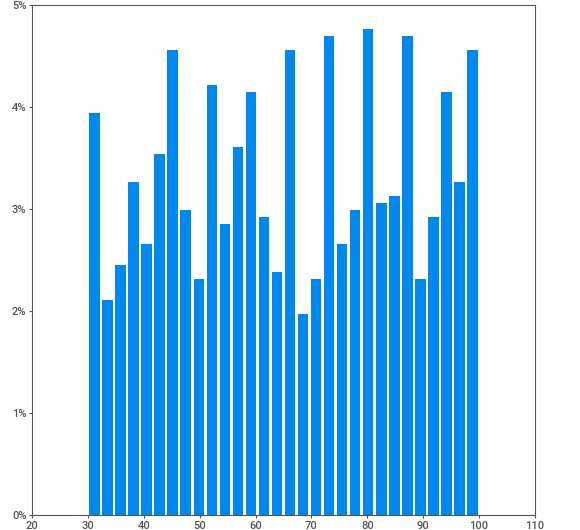
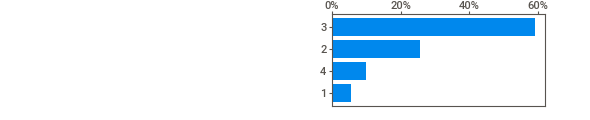
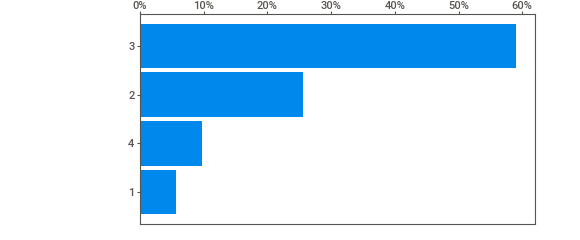
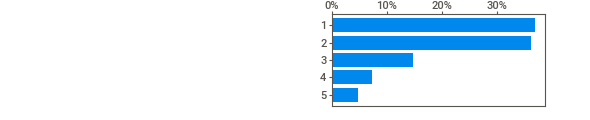
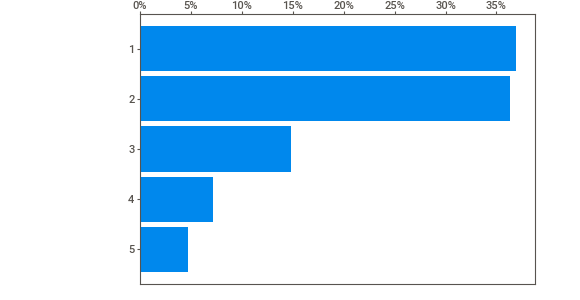
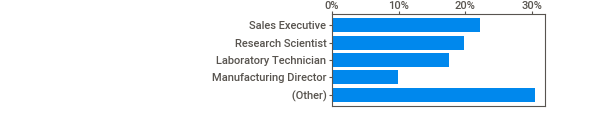
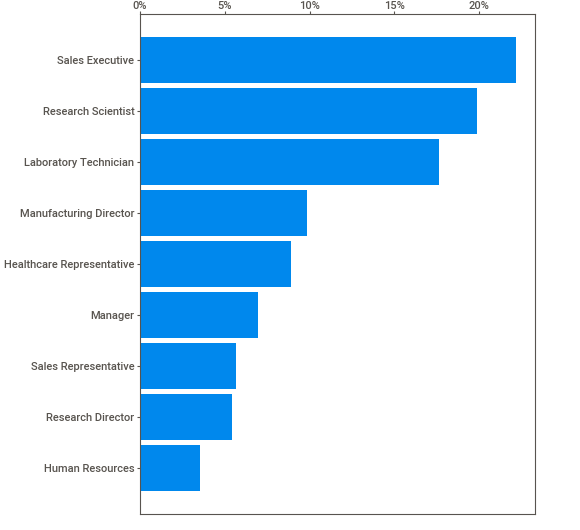
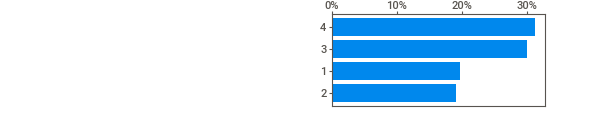
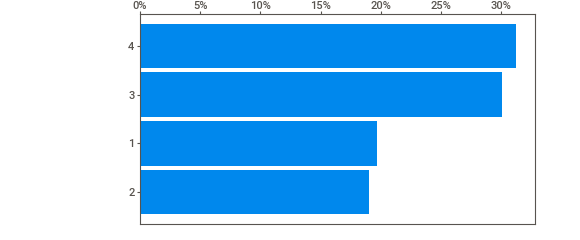
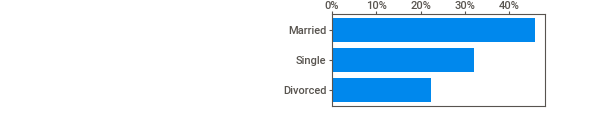
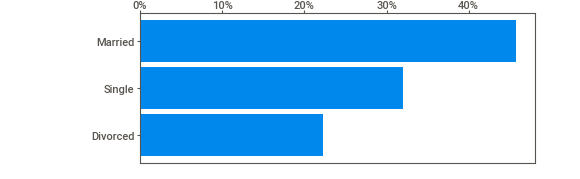
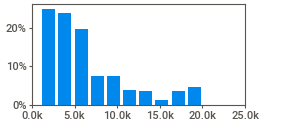
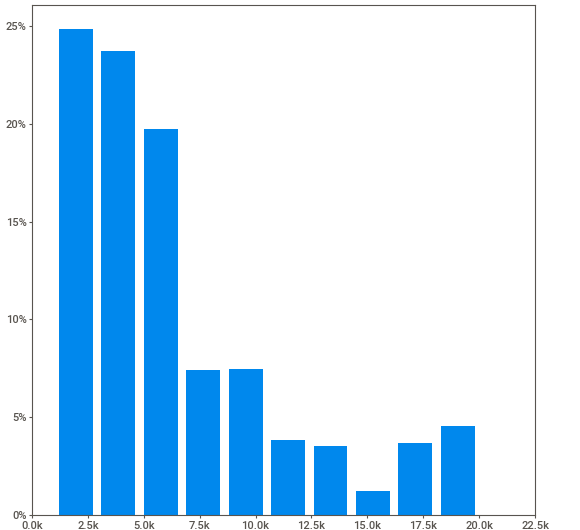
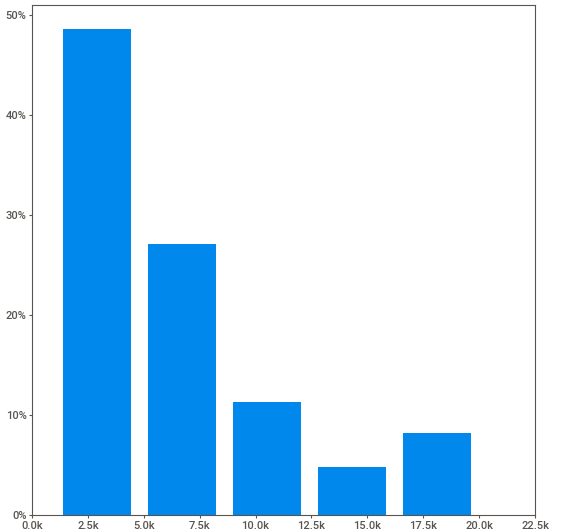
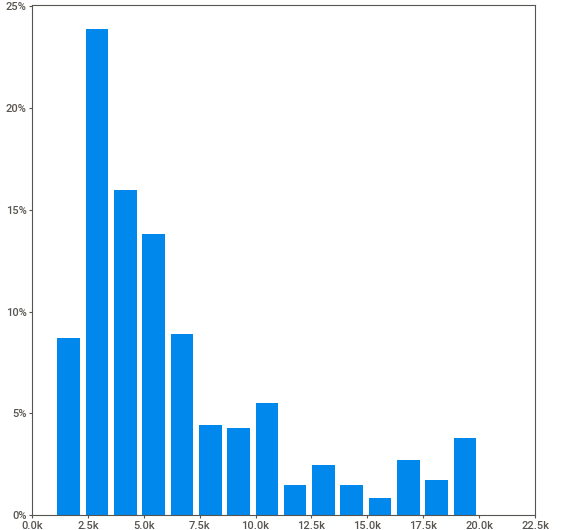
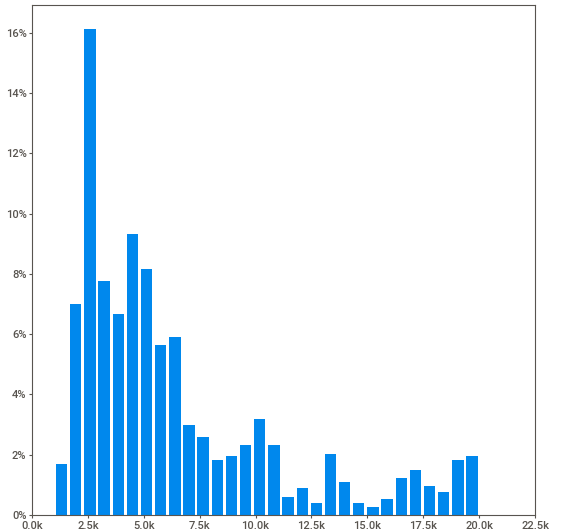
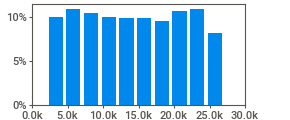
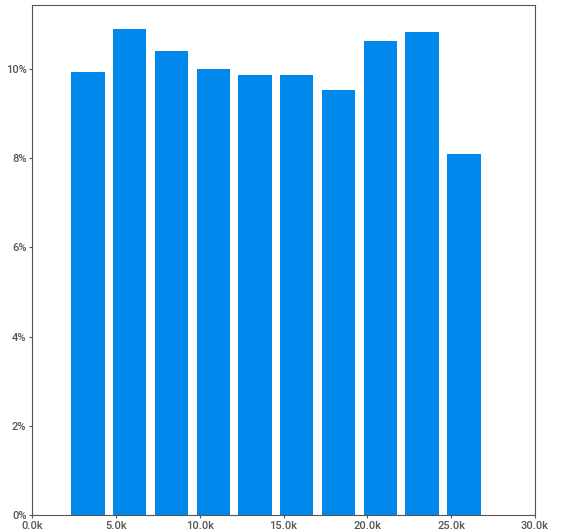
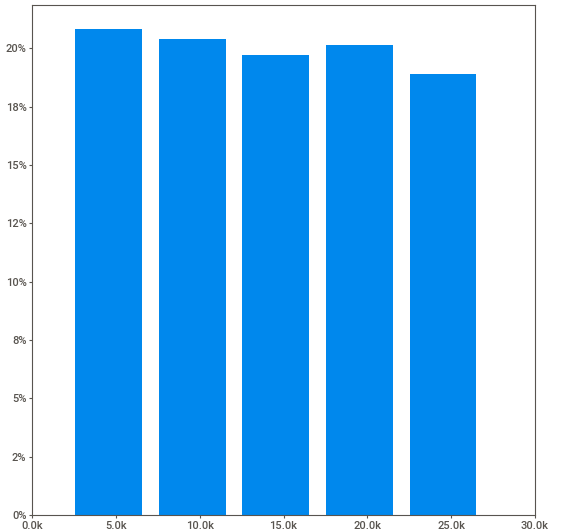
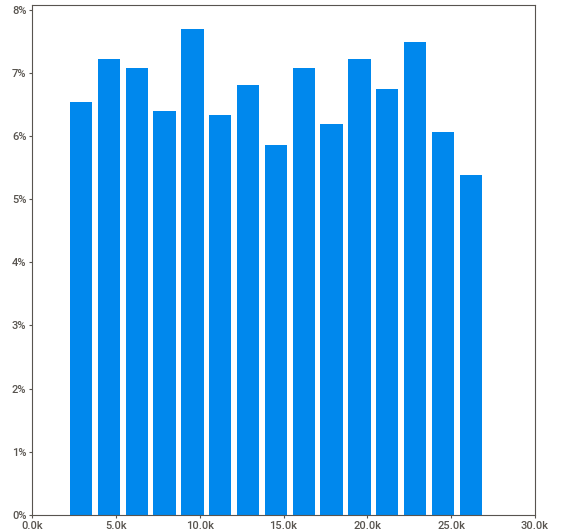
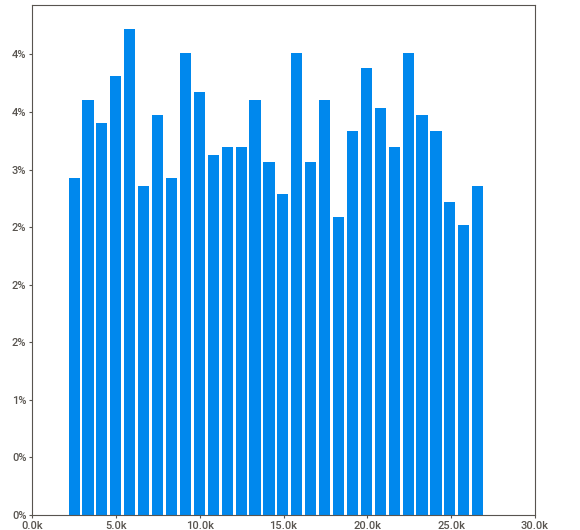
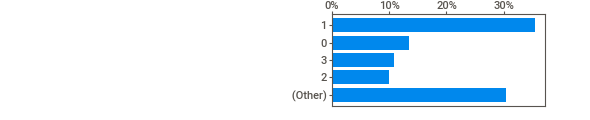
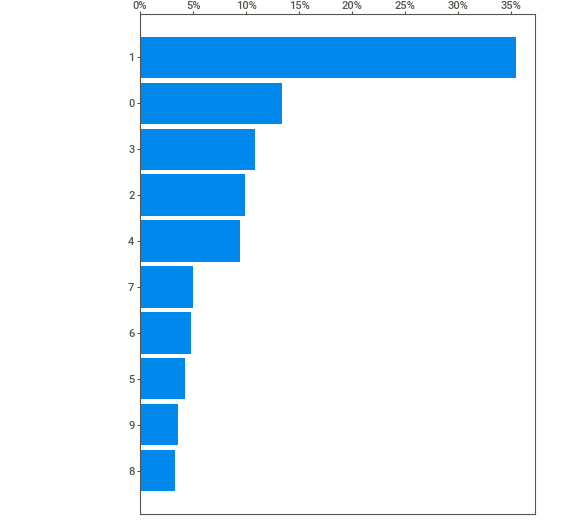
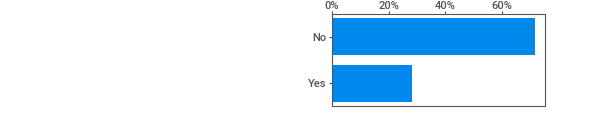
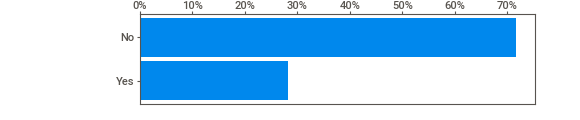
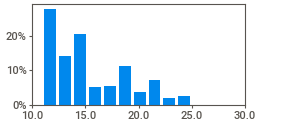
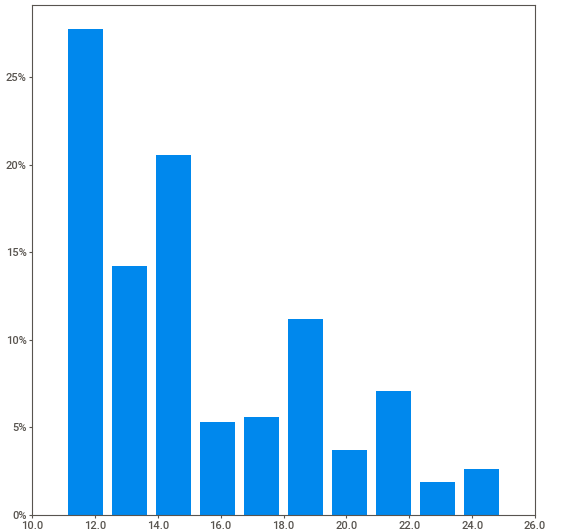
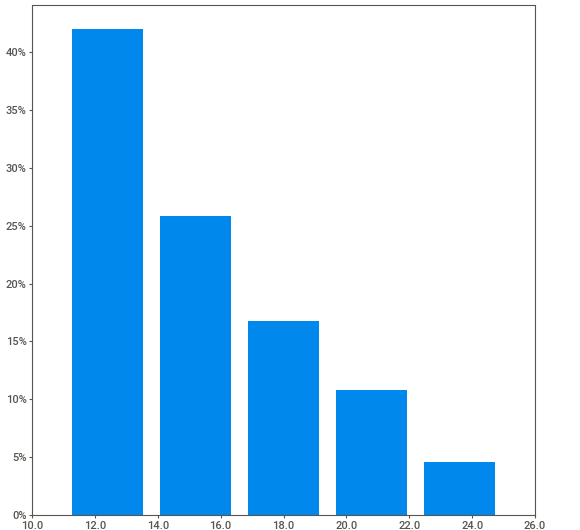
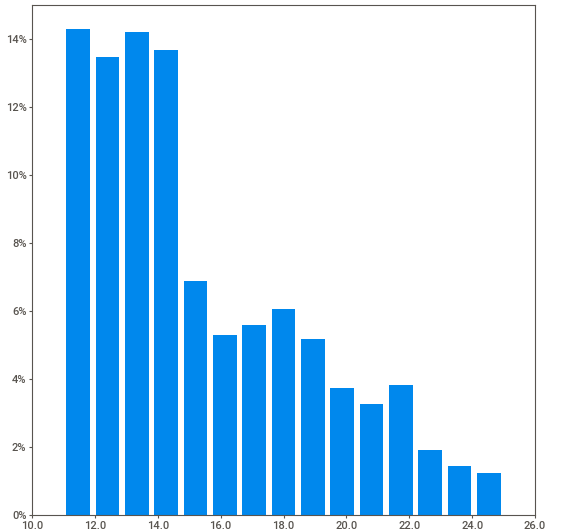
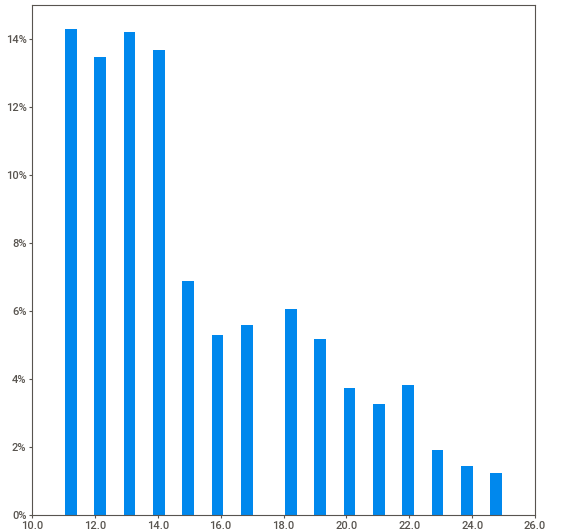
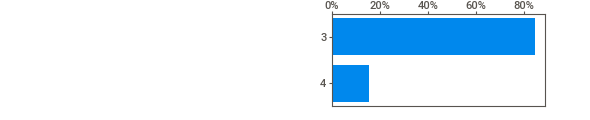
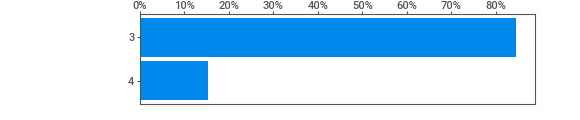
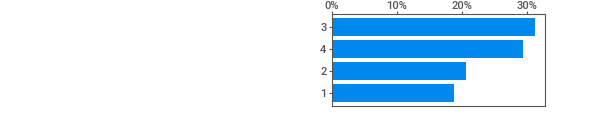
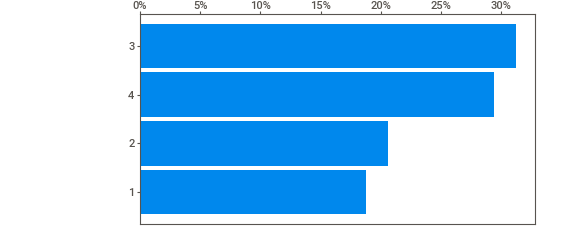
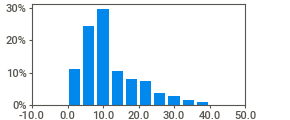
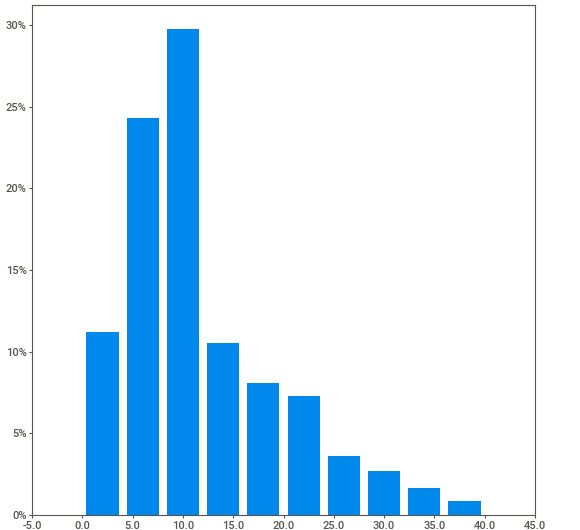
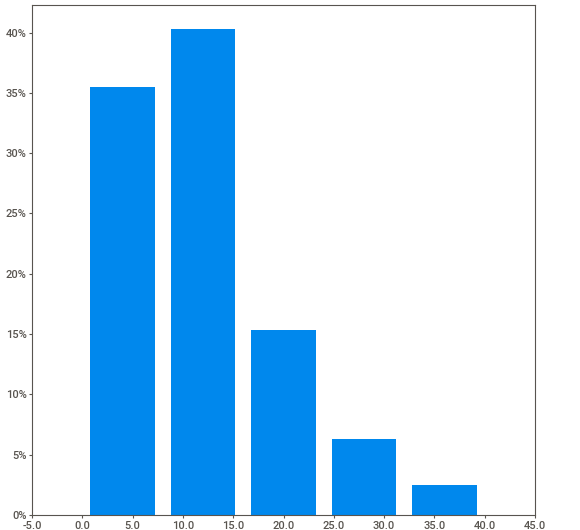
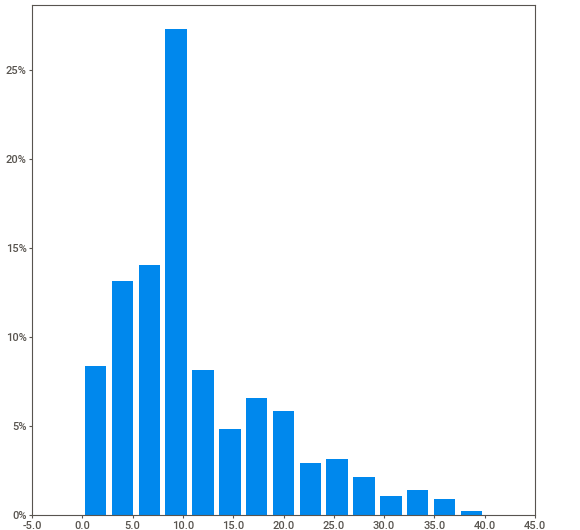
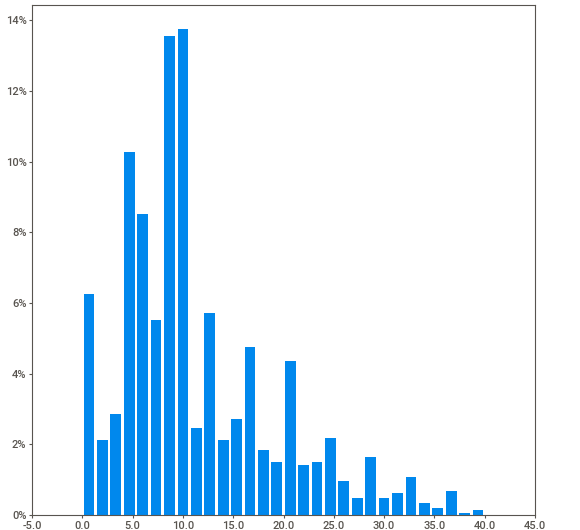
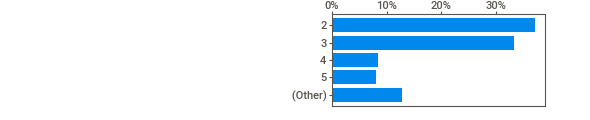
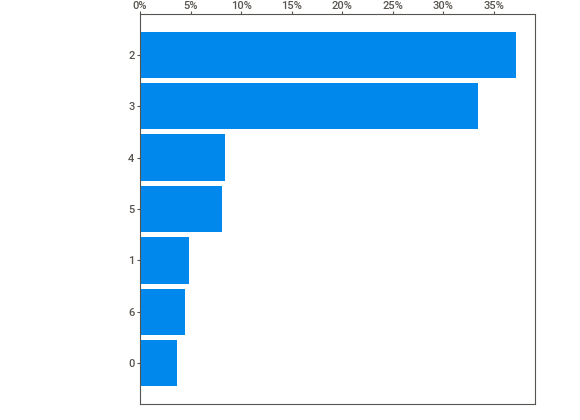
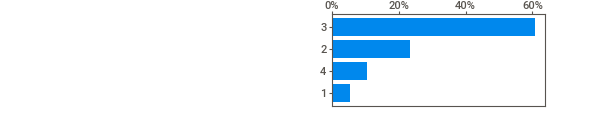
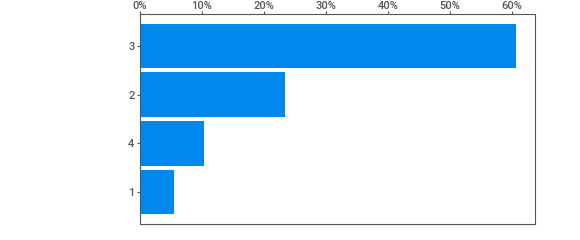
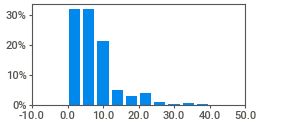
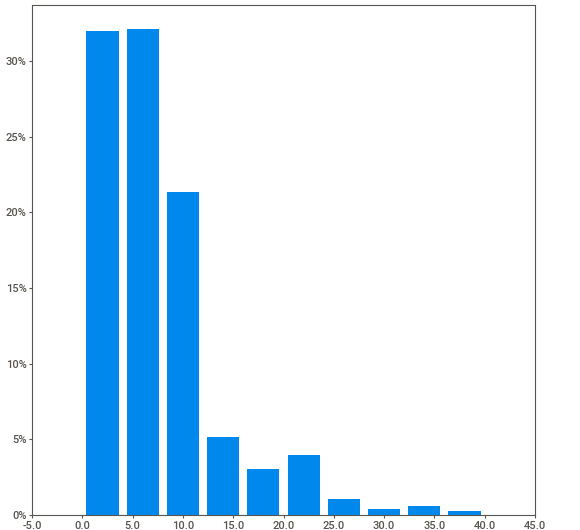
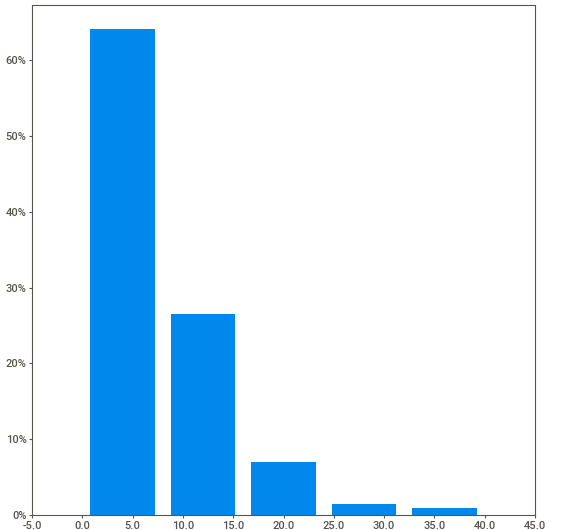
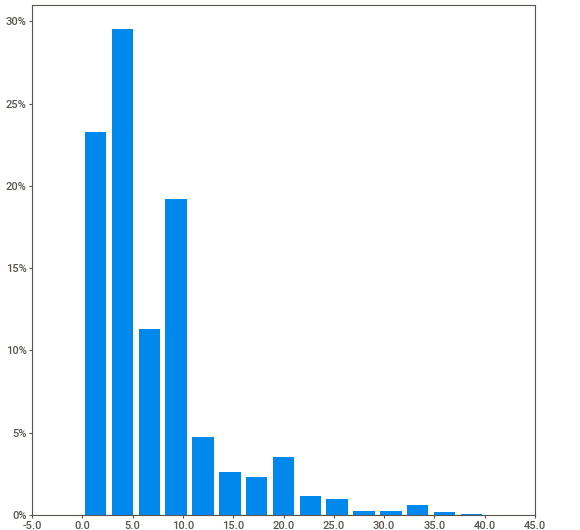
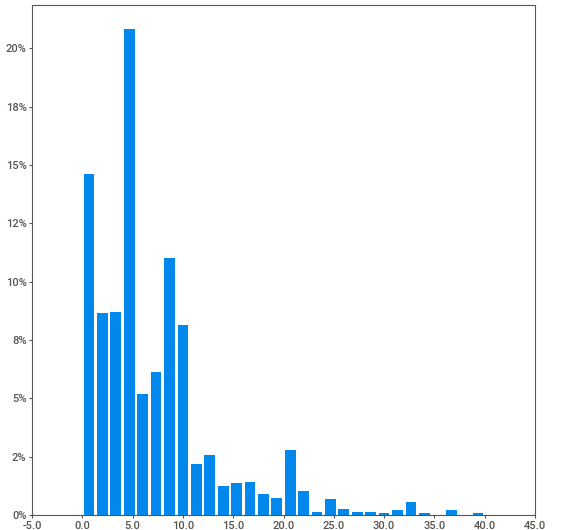
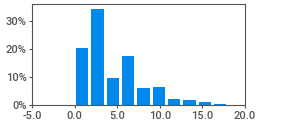
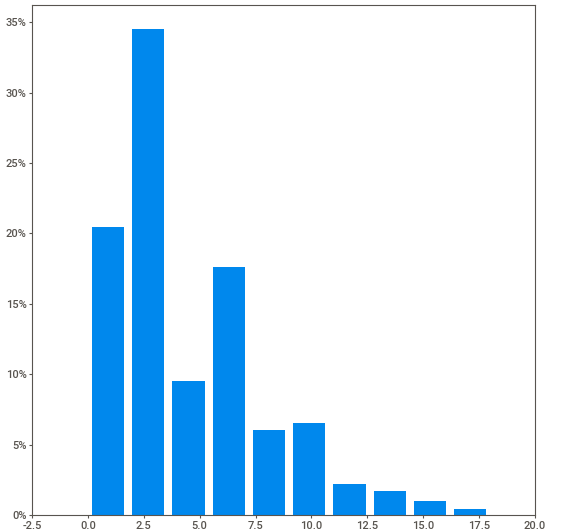
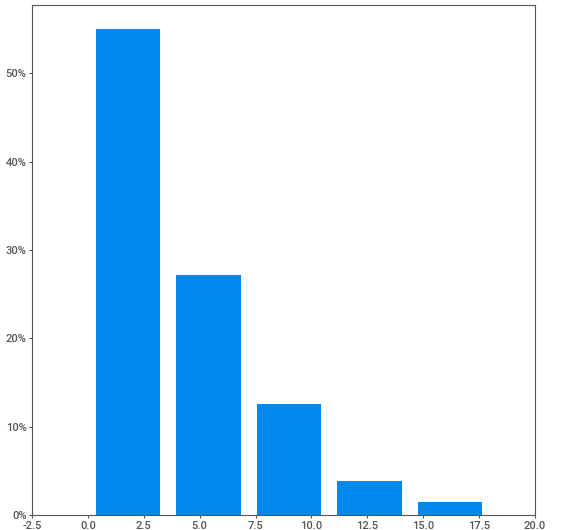
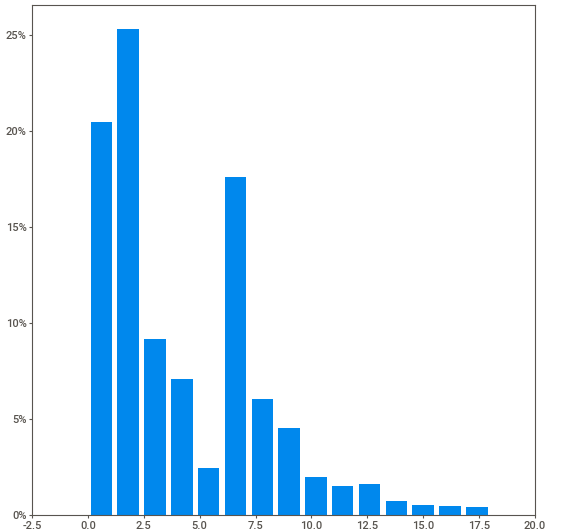
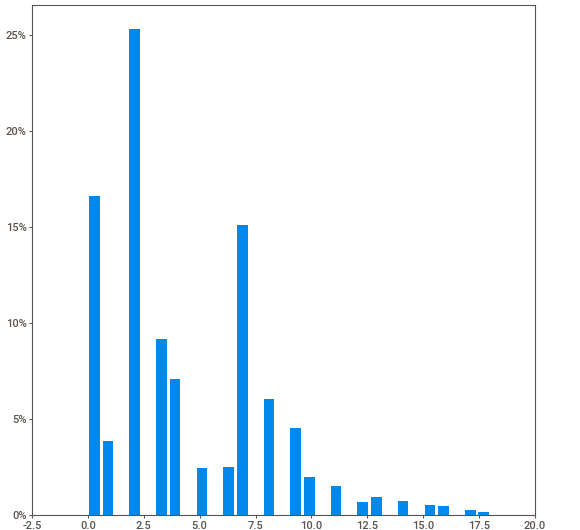
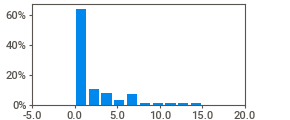
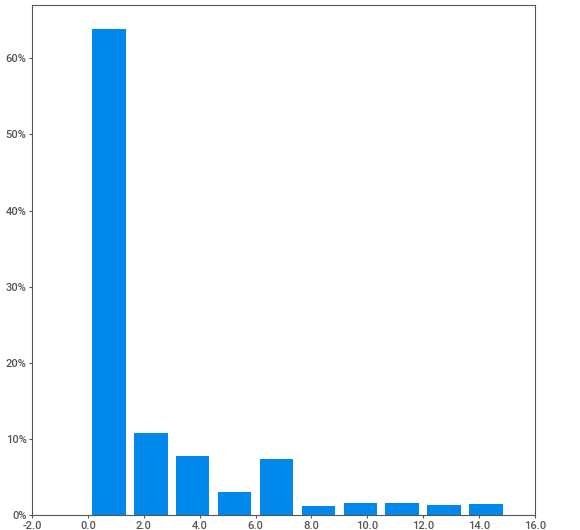
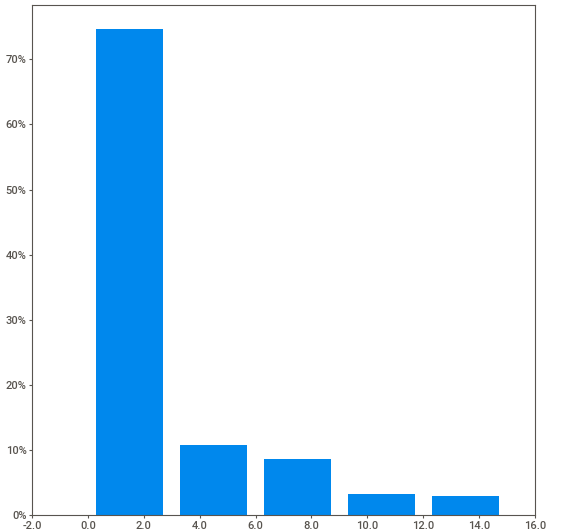
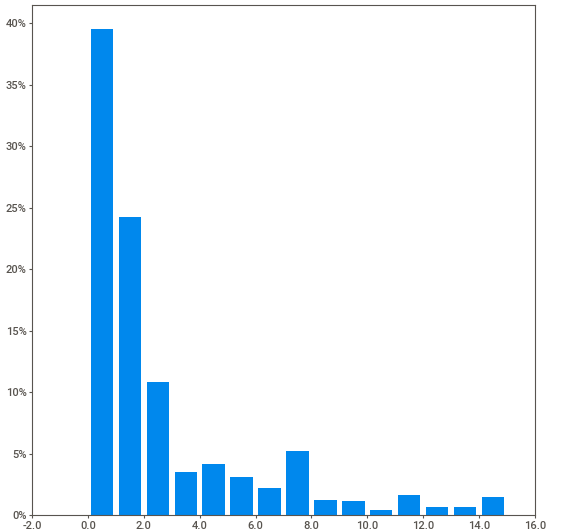
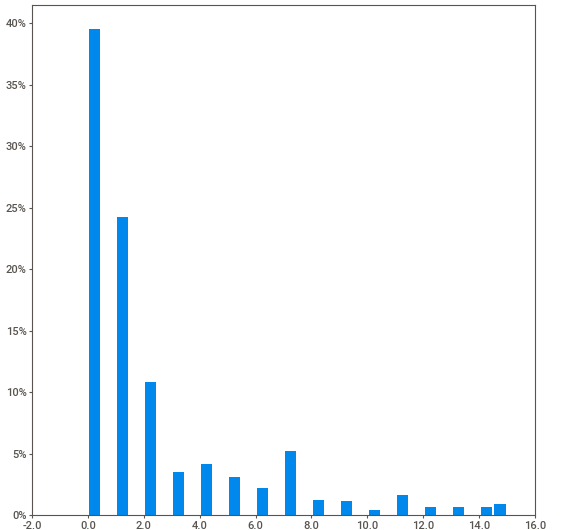
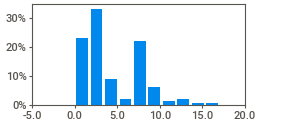
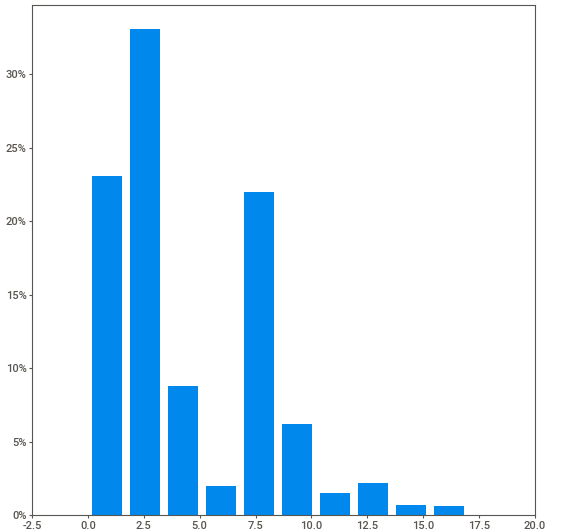
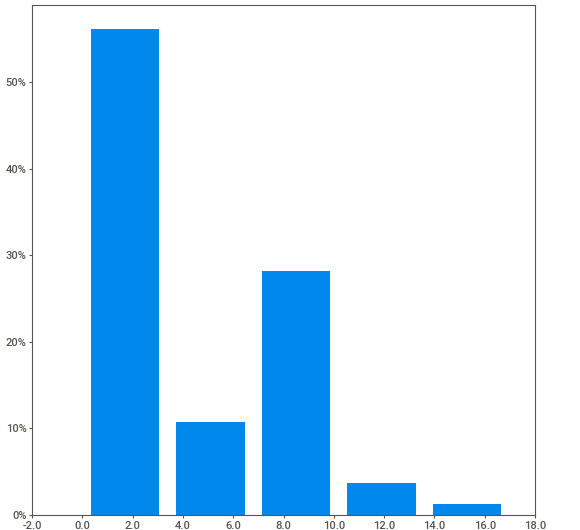
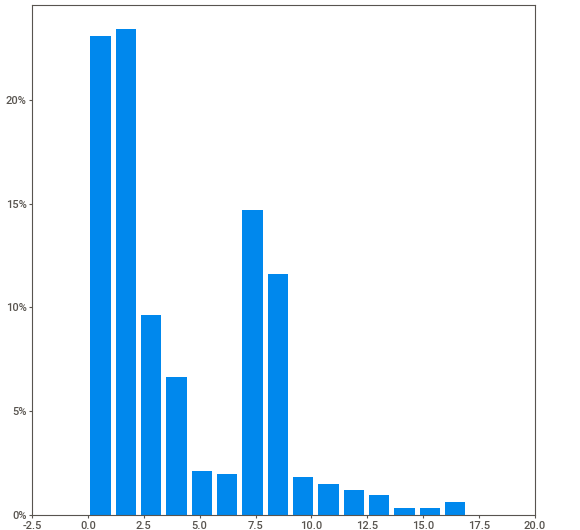
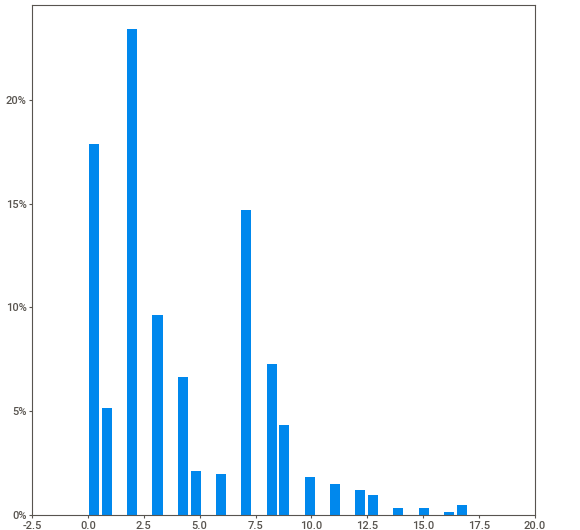
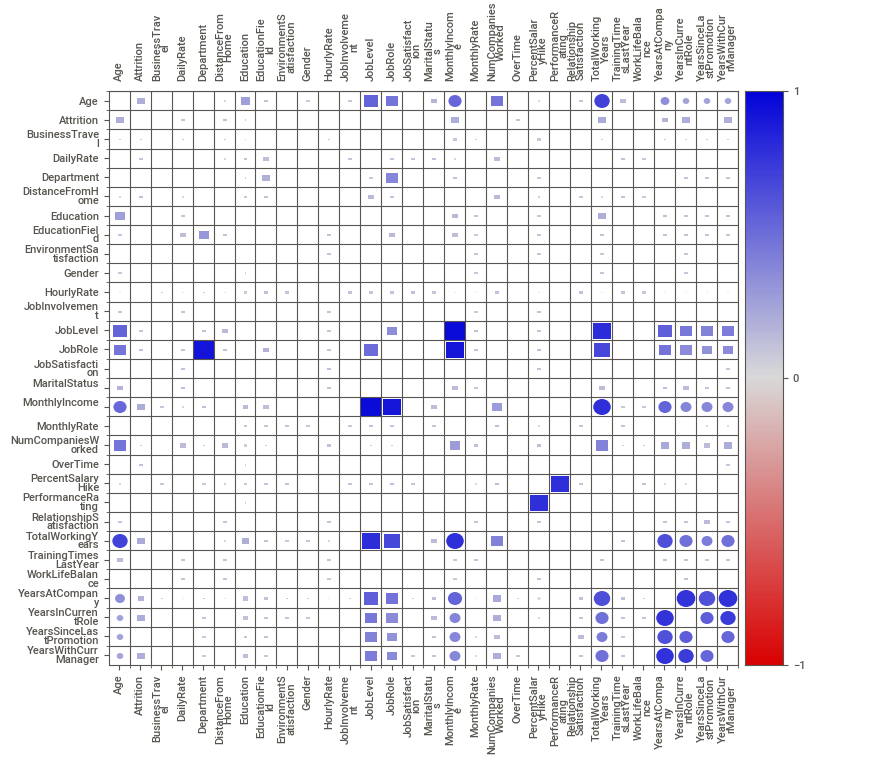
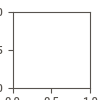

In [8]:
import sweetviz as sw
report = sw.analyze(hr)
report.show_notebook(layout='vertical')

30 features with 18 categorical data and 12 numerical data.
Attrition is our target variable.


In [9]:
fig = plo.pie(hr,names='Attrition',title='Attrition',color_discrete_sequence=plo.colors.sequential.Agsunset)
fig.show()
print(hr["Attrition"].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


# From the above pie chart of attrition show 16.1% employee quit their jobs. Gender 60% Male Employees and 40% Female Employees

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


<AxesSubplot:title={'center':'Gender vs MonthlyIncome'}, xlabel='Gender', ylabel='MonthlyIncome'>

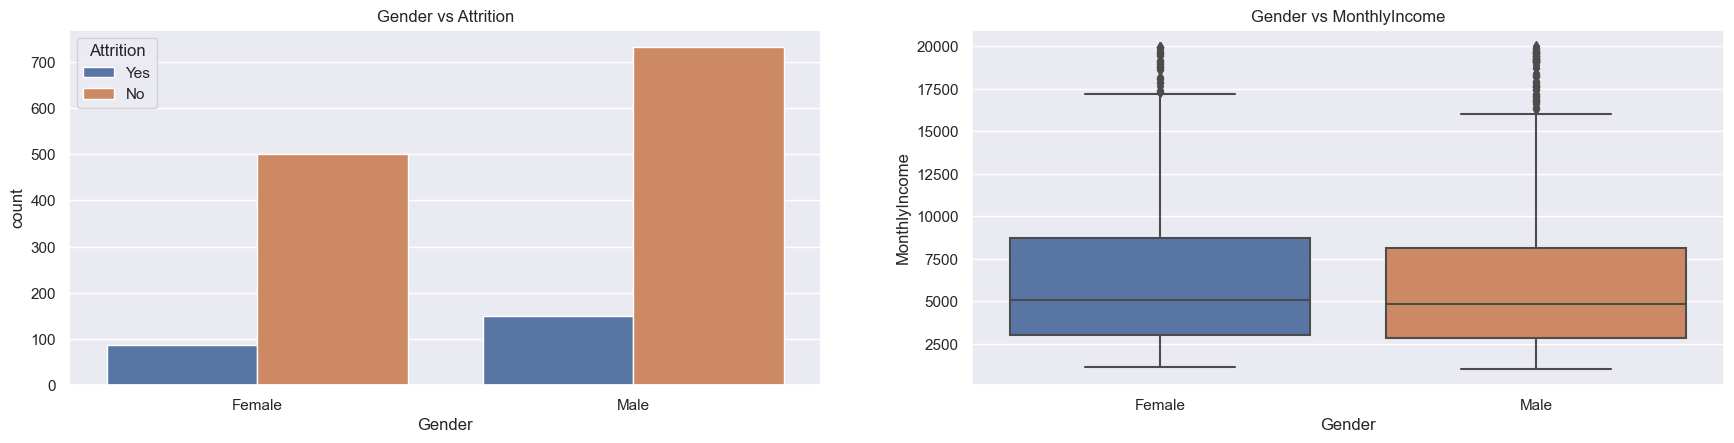

In [10]:
plt.figure(figsize=(33,16))
sns.set(style="darkgrid")
print((hr.groupby("Gender")["Attrition"]).value_counts())
plt.subplot(331)
plt.title("Gender vs Attrition")
sns.countplot(hue="Attrition",x="Gender",data=hr)

plt.subplot(332)
plt.title("Gender vs MonthlyIncome")
sns.boxplot(hr["Gender"],hr["MonthlyIncome"])


# Male members attrition is more than Female members attrition.Females Monthly Income are more than Males. 

# Age-maximum age is 60 years and minimum age is 18 years.Maximum people work are in the age group of 30-40 years

<AxesSubplot:title={'center':'Age vs Attrition'}, xlabel='Age', ylabel='Count'>

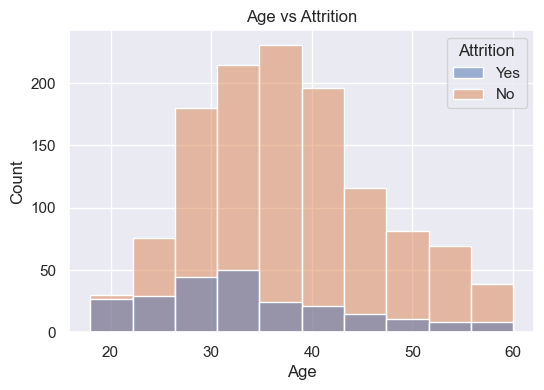

In [11]:
plt.title("Age vs Attrition")
sns.histplot(hue="Attrition",x="Age",data=hr,bins=10)

# Maximum attrition is age group of approax. 25 to 35 years.

# Business Travel: -71% employee travel rarely i.e.,1043 as per data -19% employee travel frequently i.e.,277 -10% employee non-travel i.e., 150

Attrition  BusinessTravel   
No         Travel_Rarely        887
           Travel_Frequently    208
           Non-Travel           138
Yes        Travel_Rarely        156
           Travel_Frequently     69
           Non-Travel            12
Name: BusinessTravel, dtype: int64


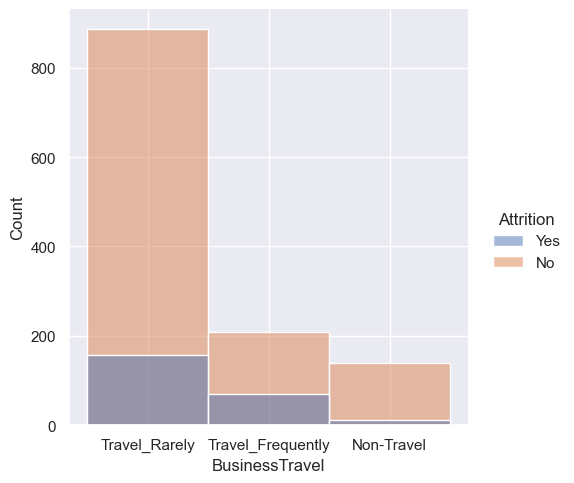

In [12]:
Business_Travel=hr.groupby("Attrition")["BusinessTravel"]
print(Business_Travel.value_counts())
sns.displot(hue="Attrition",x="BusinessTravel",data=hr)

# Data shows most of the employees who travel rarely due to Business want to quit their job.

# Department:-65% employee are in Research and Development Department -30% employee are in Sales Department -4% employee are in Human Resources Department

<AxesSubplot:title={'center':'MonthlyIncome vs Department'}, xlabel='Department', ylabel='MonthlyIncome'>

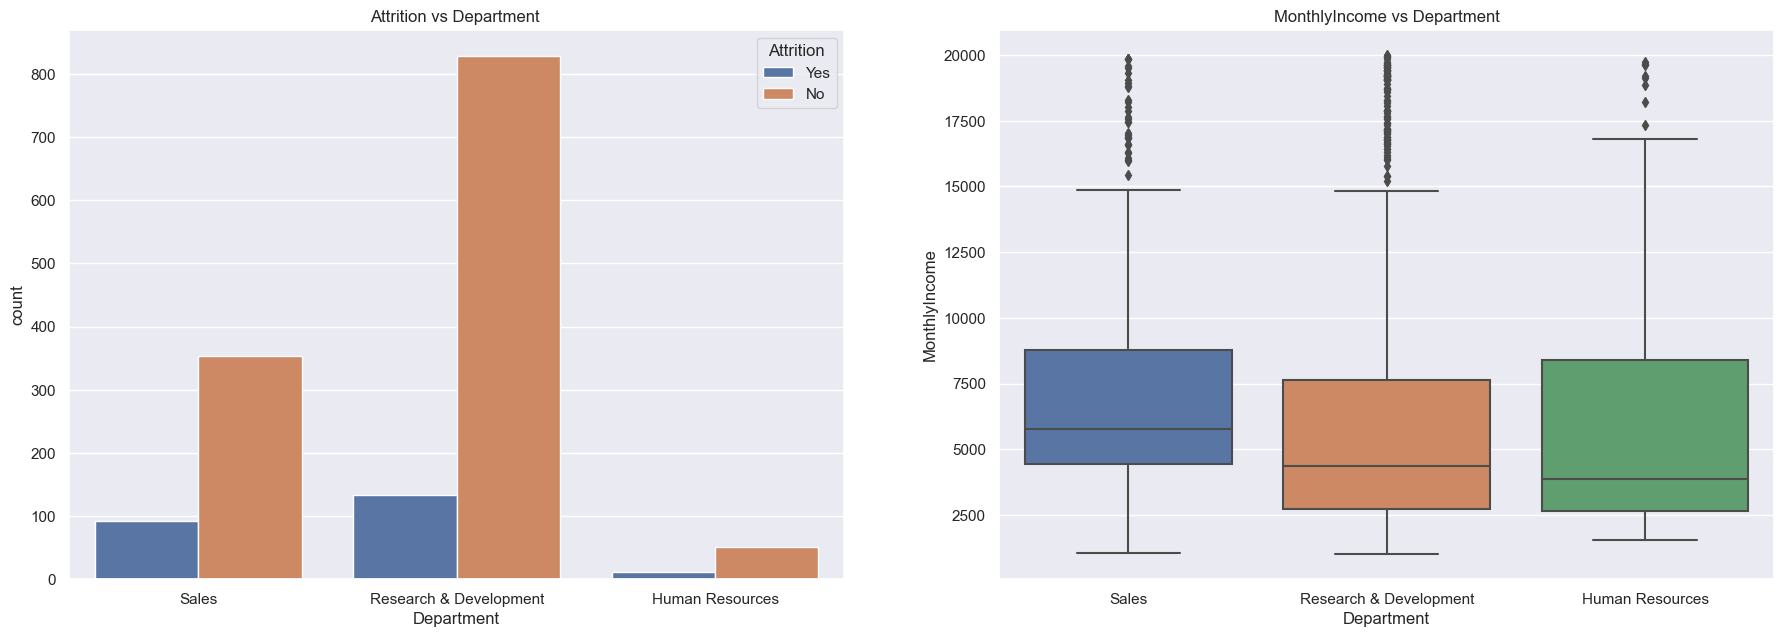

In [13]:
plt.figure(figsize=(22,16))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title("Attrition vs Department ")
sns.countplot(hue="Attrition",x="Department",data=hr)

plt.subplot(222)
plt.title("MonthlyIncome vs Department")
sns.boxplot(hr["Department"],hr["MonthlyIncome"])

# As per above graph,we can conclude that Research and Development Department employee are more who want to quit their job.MonthlyIncome of Research and Development are less than  Sales and Human Resources Department

# JobRole
Sales Executive           22%
Research Scientist        20%
Laboratory Technician     18%
Manufacturing Director    10%
Healthcare Representative 9%
Manager                   7%
Sales Representative      6%
Research Director         5%
Human Resources           4%


<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

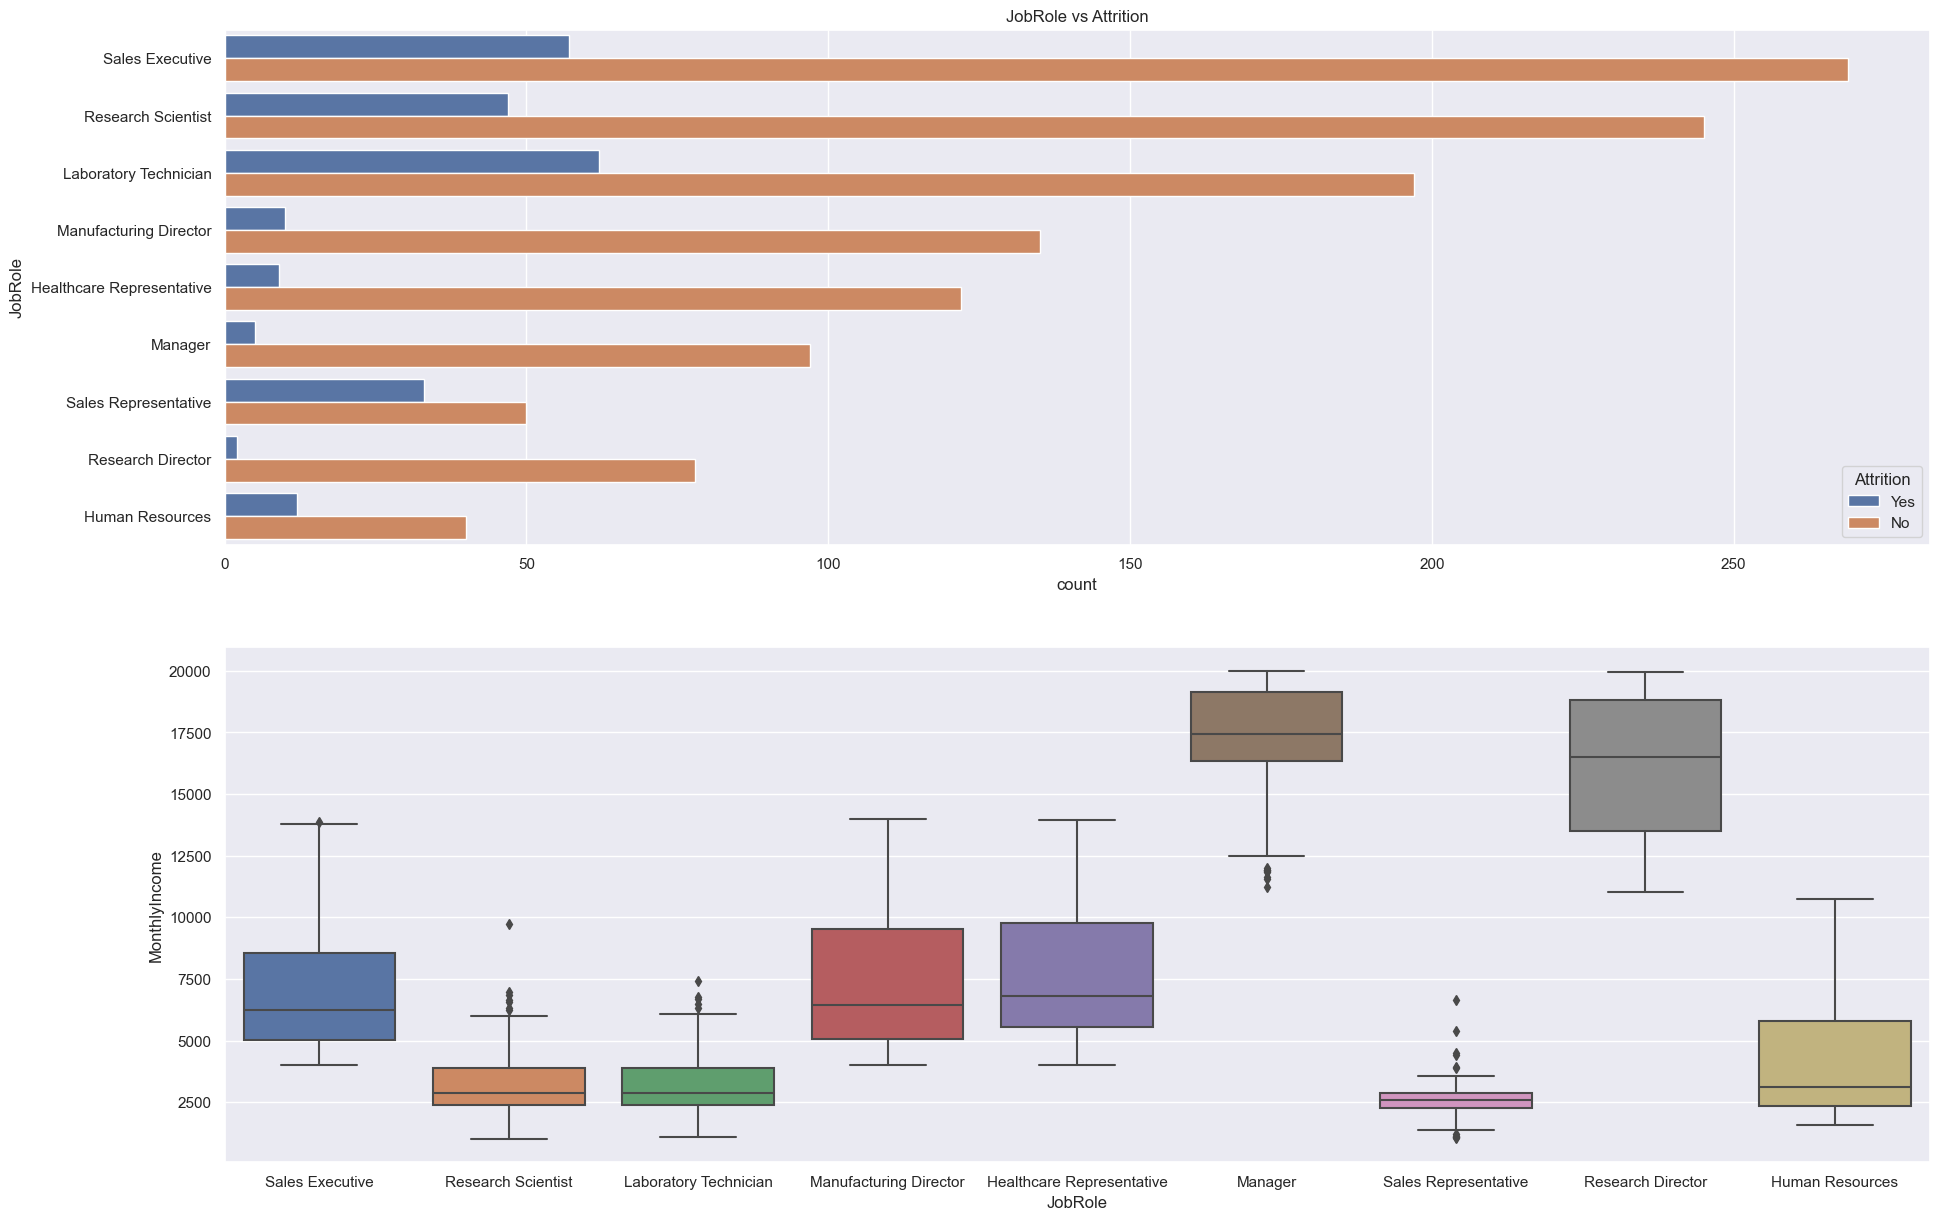

In [14]:
plt.figure(figsize=(22,15))
sns.set(style="darkgrid")
plt.subplot(211)
plt.title("JobRole vs Attrition")
sns.countplot(hue="Attrition",y="JobRole",data=hr)

plt.subplot(212)
sns.boxplot(hr["JobRole"],hr["MonthlyIncome"])

# Maximum Attrition are from Sales Executive and Laboratory Technician.MonthlyIncome of Research Scientist, Laboratory technician and sales representative are very less.

# JobInvolvement
-[1] LOW    6%
-[2] MEDIUM 26%
-[3] HIGH   59%
-[4] V.HIGH 10%

<AxesSubplot:xlabel='JobInvolvement', ylabel='MonthlyIncome'>

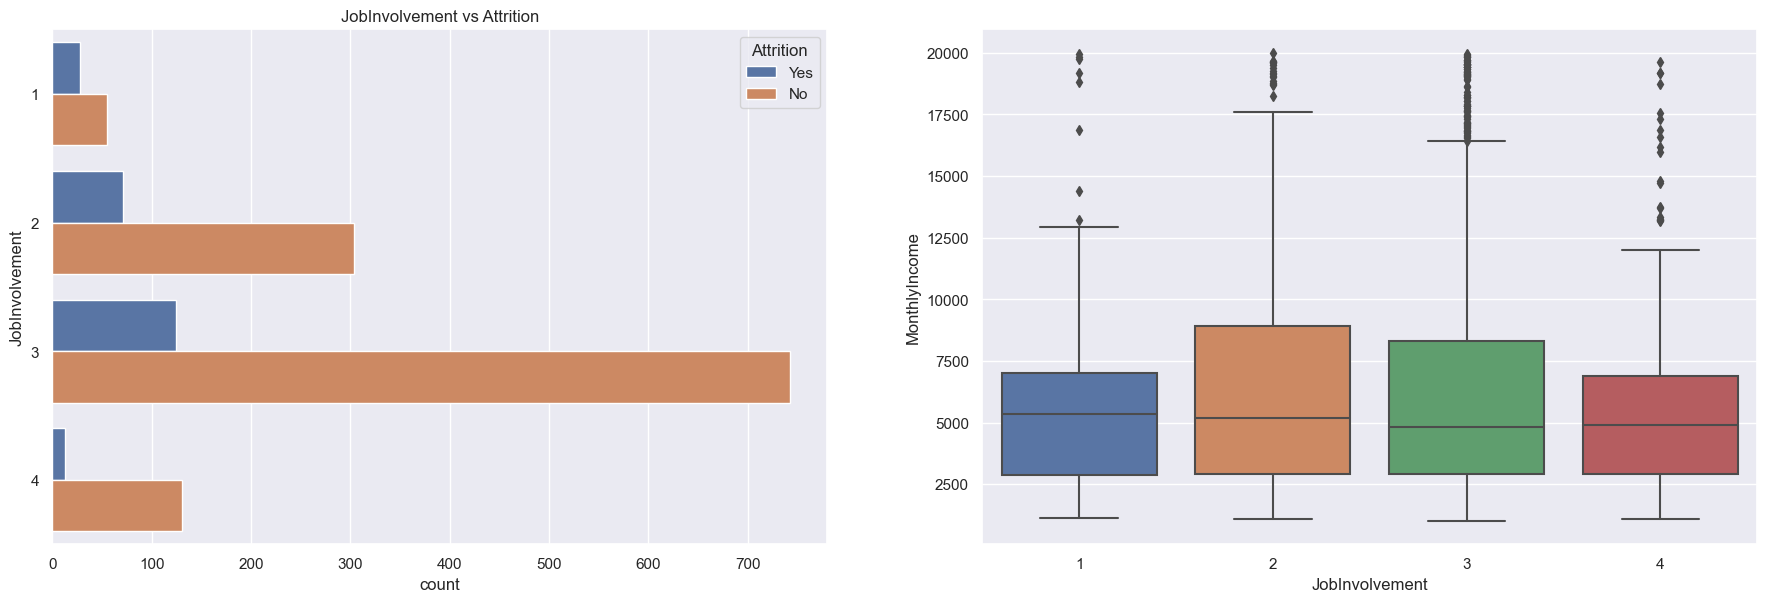

In [15]:
plt.figure(figsize=(22,15))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title("JobInvolvement vs Attrition")
sns.countplot(hue="Attrition",y="JobInvolvement",data=hr)

plt.subplot(222)
sns.boxplot(hr["JobInvolvement"],hr["MonthlyIncome"])

# More employee who has high job involvment are tend to Attrition.Employee who have medium involvment in the job tend to high MonthlyIncome.

# Education Field
-41% :Life science
-32% :Medical
-11% :Marketing
-9%  :Technical Degree
-2%  :Human Resources    

<AxesSubplot:xlabel='EducationField', ylabel='MonthlyIncome'>

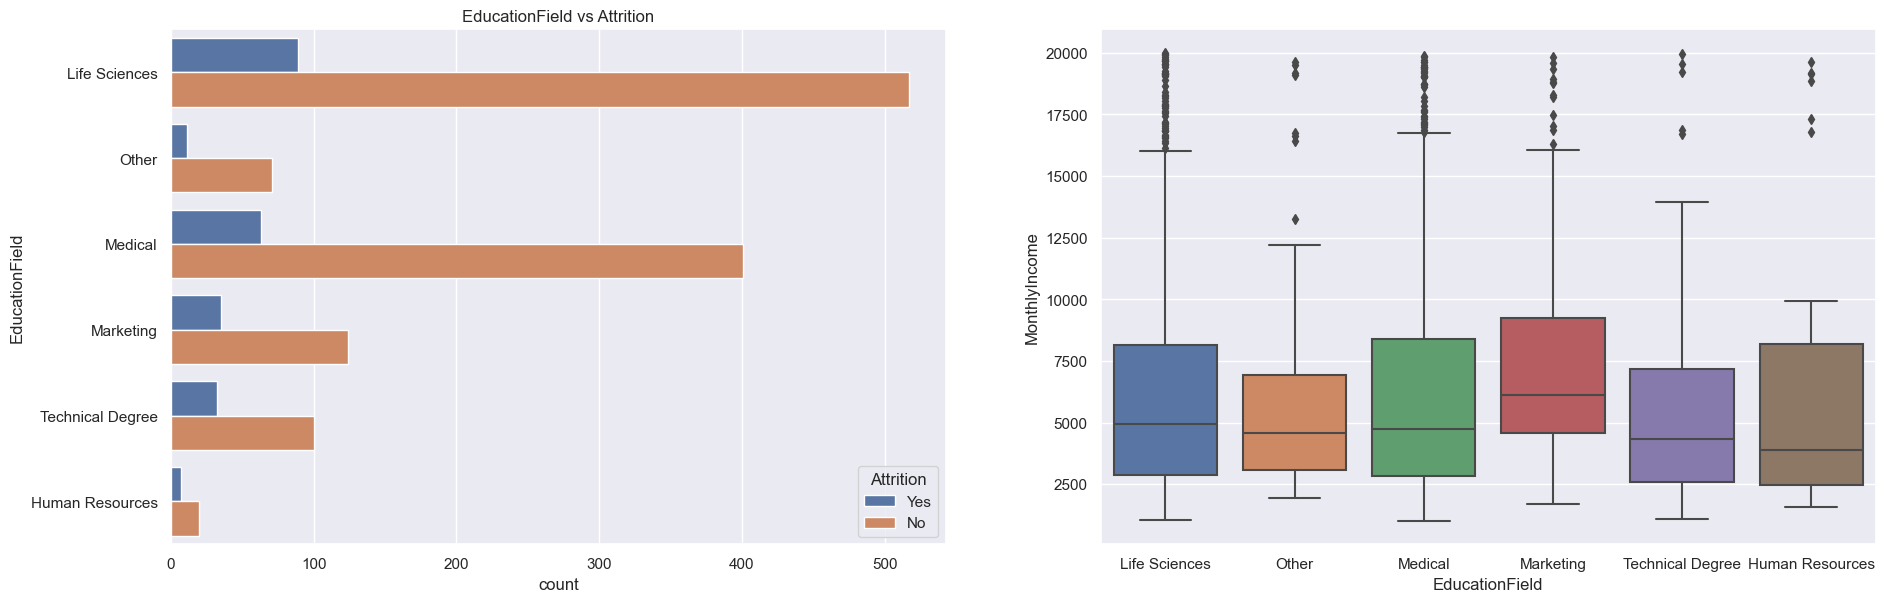

In [16]:
plt.figure(figsize=(22,15))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title("EducationField vs Attrition")
sns.countplot(hue="Attrition",y="EducationField",data=hr)

plt.subplot(222)
sns.boxplot(hr["EducationField"],hr["MonthlyIncome"])

# As per above graph,More Attrition are from LifeSciences EducationField.Monthly Income of Marketing is higher than LifeSciences.

# Education
-[1] Below College   : 12%
-[2] College         : 19%
-[3] Bachelor        : 39%
-[4] Masters         : 27%
-[5] Doctors         : 3%

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

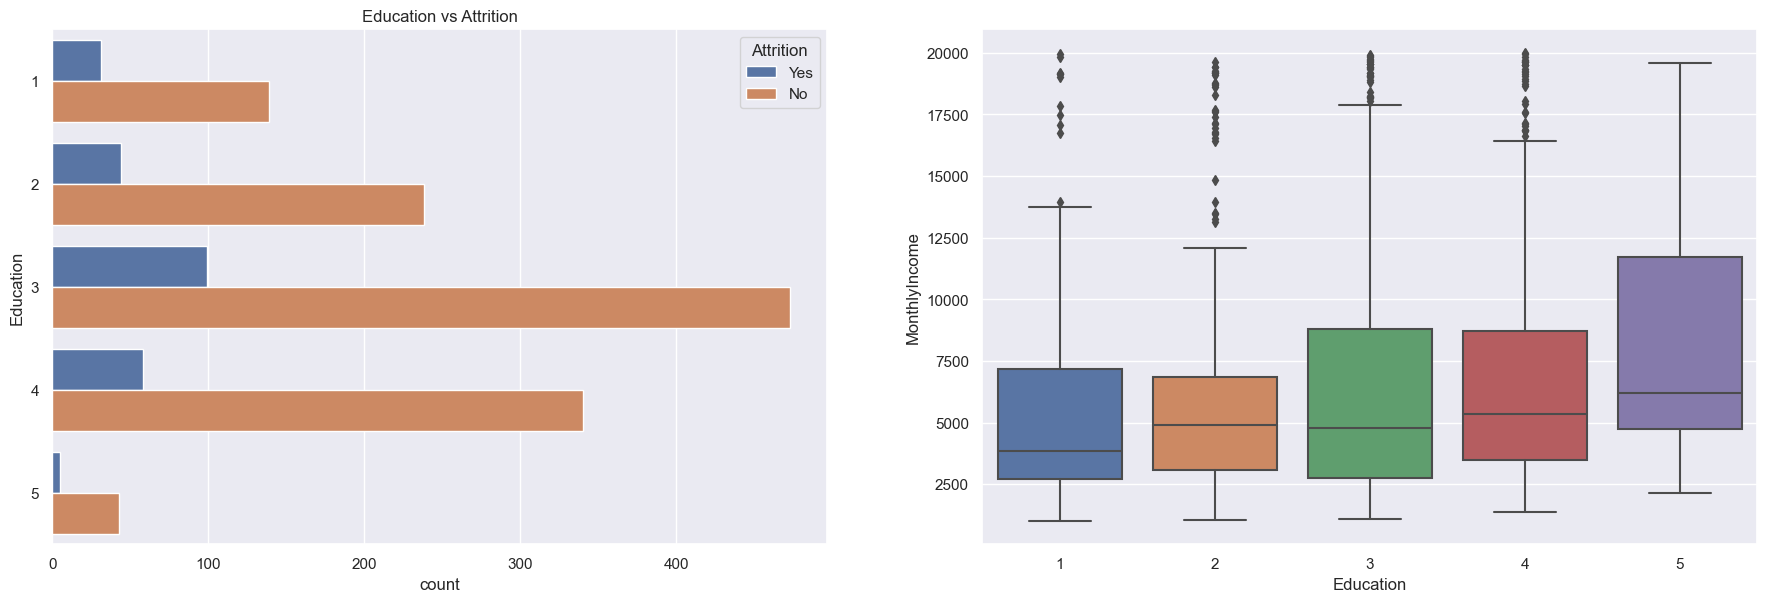

In [17]:
plt.figure(figsize=(22,15))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title("Education vs Attrition")
sns.countplot(hue="Attrition",y="Education",data=hr)

plt.subplot(222)
sns.boxplot(hr["Education"],hr["MonthlyIncome"])

# Maximum Attrition of employees who have Bachelors Degree.Doctors have maximum monthly income.

# Environment Satisfaction
-[1] Low   :19%
-[2] Medium:20%
-[3] High  :31%
-[4] V.High:30%    

<AxesSubplot:title={'center':'EnvironmentSatisfaction vs MonthlyIncome'}, xlabel='EnvironmentSatisfaction', ylabel='MonthlyIncome'>

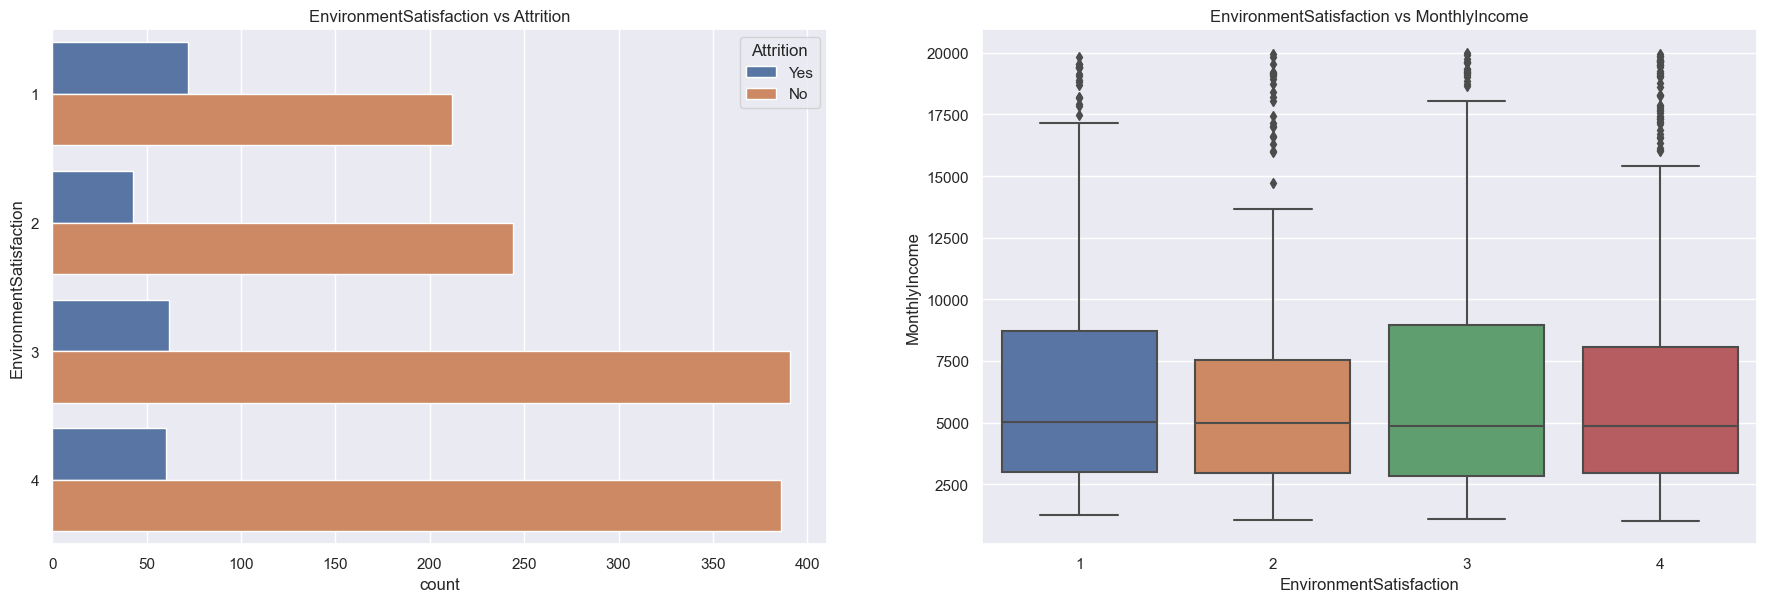

In [18]:
plt.figure(figsize=(22,15))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title("EnvironmentSatisfaction vs Attrition")
sns.countplot(hue="Attrition",y="EnvironmentSatisfaction",data=hr)

plt.subplot(222)
plt.title("EnvironmentSatisfaction vs MonthlyIncome")
sns.boxplot(hr["EnvironmentSatisfaction"],hr["MonthlyIncome"])

# Employee who are low Environment Satisfaction are led to Attrition.Those Employee who have low and high Environment Satisfaction lead to high Monthly Income.

# Job Satisfaction
4 [V.HIGH] 31%
3 [HIGH]   30%
2 [MEDIUM] 19%
1 [LOW]    20%

<AxesSubplot:title={'center':'JobSatisfaction vs MonthlyIncome'}, xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

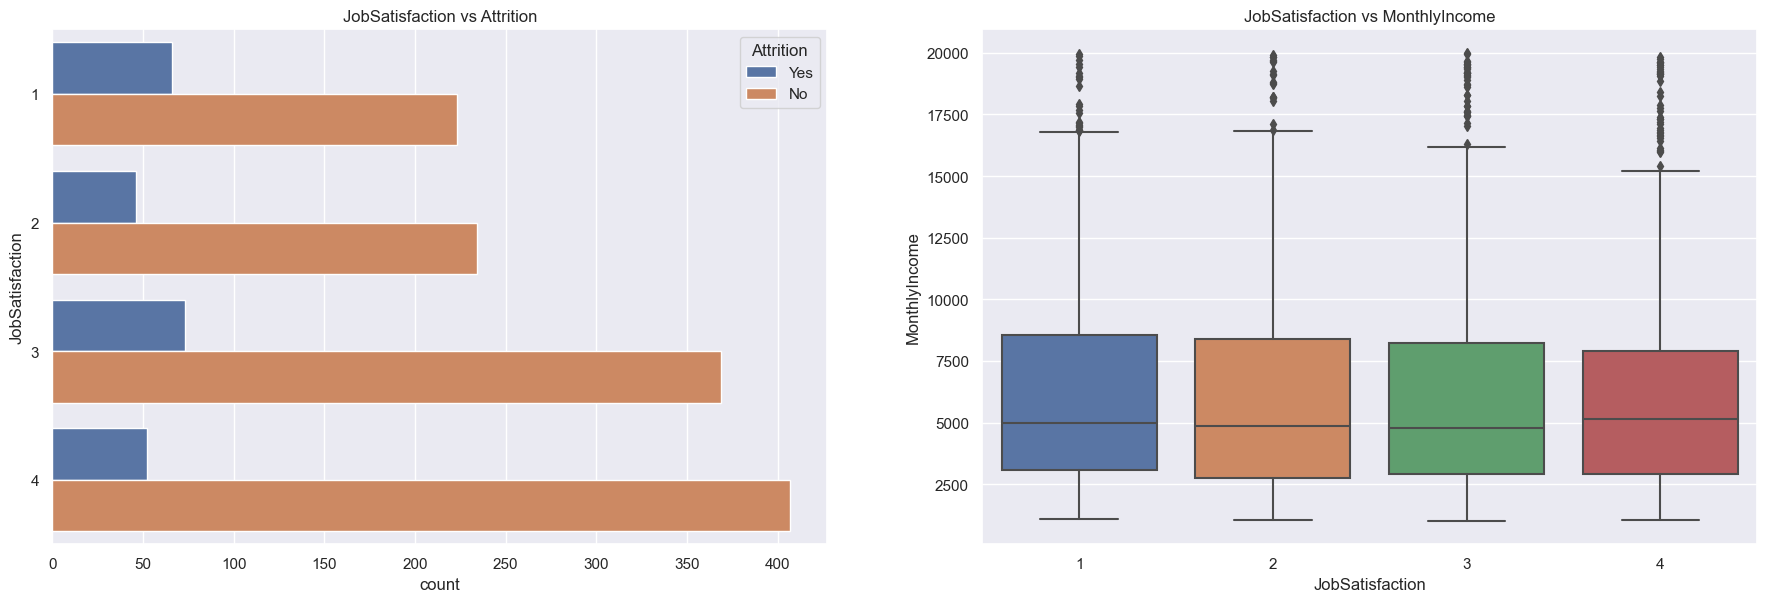

In [19]:
plt.figure(figsize=(22,15))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title("JobSatisfaction vs Attrition")
sns.countplot(hue="Attrition",y="JobSatisfaction",data=hr)

plt.subplot(222)
plt.title("JobSatisfaction vs MonthlyIncome")
sns.boxplot(hr["JobSatisfaction"],hr["MonthlyIncome"])

# Maximum Attrition are from employee who are v.low and medium satisfied with their jobs.


# MaritalStatus
Married     46%
Single      32%
Divorced    22%


<AxesSubplot:title={'center':'MaritalStatus vs MonthlyIncome'}, xlabel='MaritalStatus', ylabel='MonthlyIncome'>

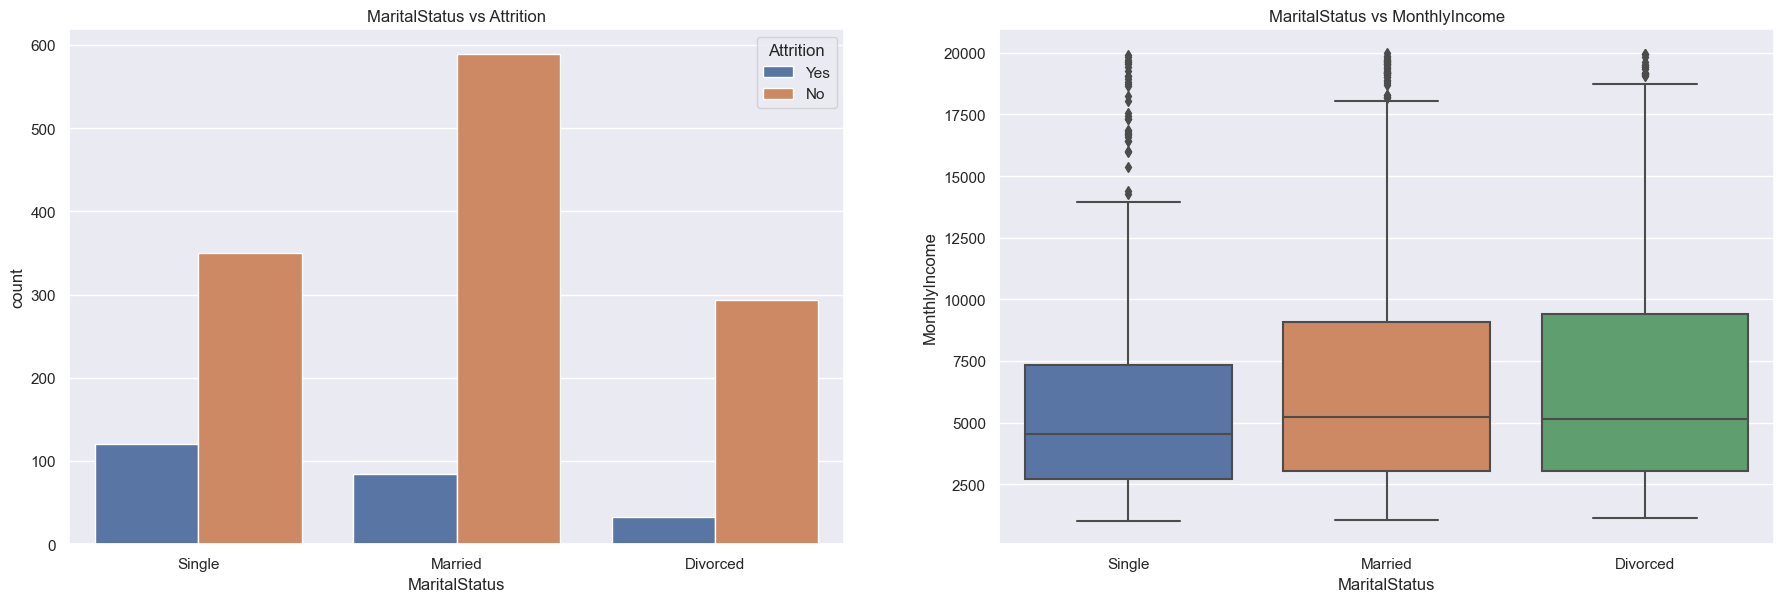

In [20]:
plt.figure(figsize=(22,15))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title("MaritalStatus vs Attrition")
sns.countplot(hue="Attrition",x="MaritalStatus",data=hr)

plt.subplot(222)
plt.title("MaritalStatus vs MonthlyIncome")
sns.boxplot(hr["MaritalStatus"],hr["MonthlyIncome"])

# Maximum Attrition by employee who are single.Married and Divorced employee have maximum monthly salary than single employee.

# OverTime
No    72%
Yes   28%

<AxesSubplot:xlabel='OverTime', ylabel='count'>

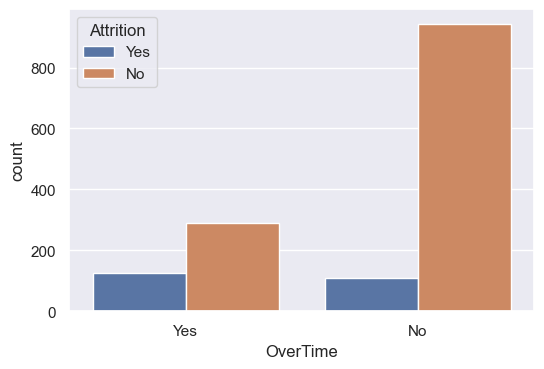

In [21]:
sns.countplot(hue="Attrition",x="OverTime",data=hr)

# Employee who do overtime are tend to Attrition

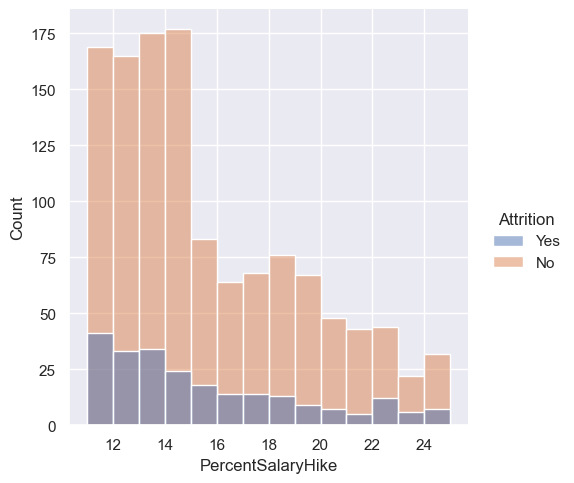

In [22]:
#PercentSalaryHike
sns.displot(hue="Attrition",x="PercentSalaryHike",data=hr)

# Employee who has less percent of salary hike are tend to attrition

# Performance Rating
[3] HIGH   85%
[4] V.HIGH 15%

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

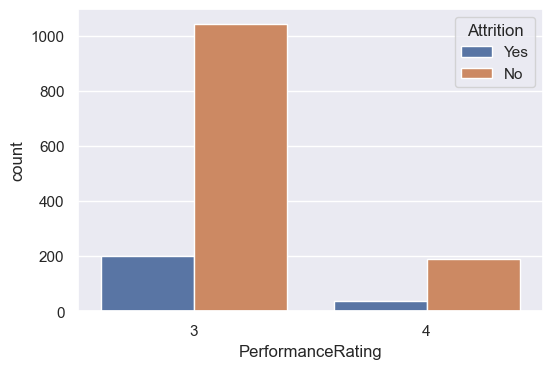

In [23]:
sns.countplot(hue="Attrition",x="PerformanceRating",data=hr)

# Employee who have high performance rating are tend to attrition

# WorkLifeBalance
[1] BAD    5%
[2] GOOD   23%
[3] BETTER 61%
[4] BEST   10%


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

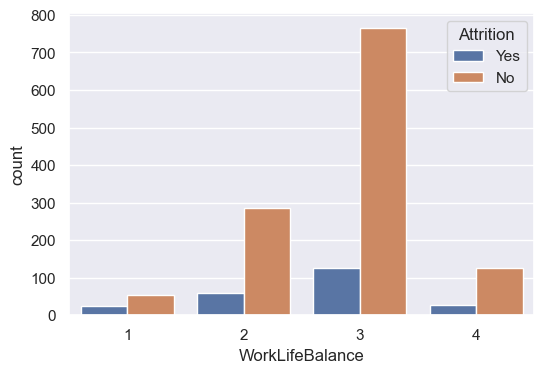

In [24]:
sns.countplot(hue="Attrition",x="WorkLifeBalance",data=hr)

# Employee who have better worklife balance tend to Attrition

<AxesSubplot:title={'center':'YearsInCurrentRole vs Attrition'}, xlabel='YearsInCurrentRole', ylabel='Density'>

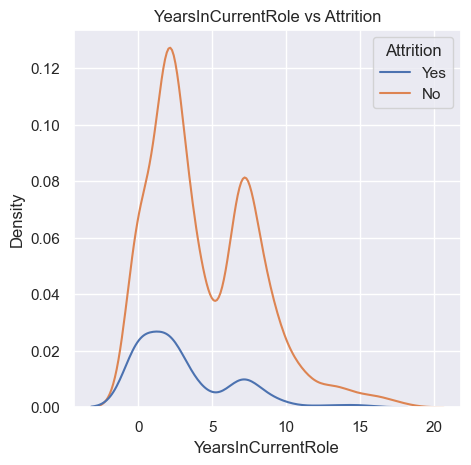

In [25]:
plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
plt.title("YearsInCurrentRole vs Attrition")
sns.kdeplot(hue="Attrition",x="YearsInCurrentRole",data=hr)

<AxesSubplot:title={'center':'YearsAtCompany vs Attrition'}, xlabel='YearsAtCompany', ylabel='Density'>

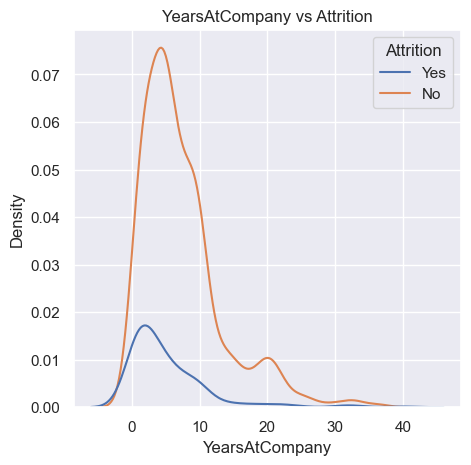

In [26]:
plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
plt.title("YearsAtCompany vs Attrition")
sns.kdeplot(hue="Attrition",x="YearsAtCompany",data=hr)

<AxesSubplot:title={'center':'TotalWorkingYears vs Attrition'}, xlabel='TotalWorkingYears', ylabel='Density'>

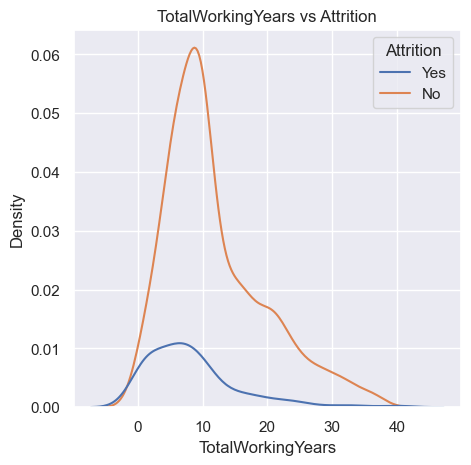

In [27]:
plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
plt.title("TotalWorkingYears vs Attrition")
sns.kdeplot(hue="Attrition",x="TotalWorkingYears",data=hr)

<AxesSubplot:title={'center':'NumCompaniesWorked vs Attrition'}, xlabel='NumCompaniesWorked', ylabel='Density'>

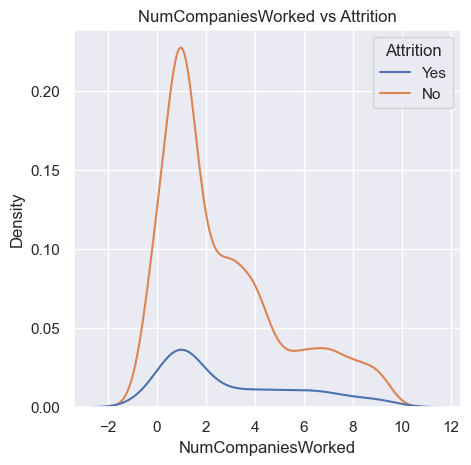

In [28]:
plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
plt.title("NumCompaniesWorked vs Attrition")
sns.kdeplot(hue="Attrition",x="NumCompaniesWorked",data=hr)

<AxesSubplot:>

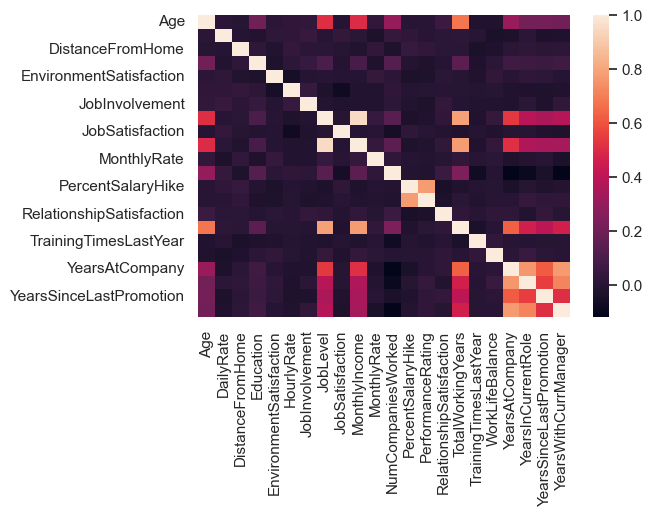

In [29]:
sns.heatmap(hr.corr())

In [30]:
le=LabelEncoder()

Attrition_le= LabelEncoder()
hr["Attrition"]=Attrition_le.fit_transform(hr["Attrition"])

Gender_le= LabelEncoder()
hr["Gender"]=Attrition_le.fit_transform(hr["Gender"])

BusinessTravel_le= LabelEncoder()
hr["BusinessTravel"]=Attrition_le.fit_transform(hr["BusinessTravel"])

Department_le= LabelEncoder()
hr["Department"]=Attrition_le.fit_transform(hr["Department"])

EducationField_le= LabelEncoder()
hr["EducationField"]=Attrition_le.fit_transform(hr["EducationField"])

JobRole_le= LabelEncoder()
hr["JobRole"]=Attrition_le.fit_transform(hr["JobRole"])


MaritalStatus_le= LabelEncoder()
hr["MaritalStatus"]=Attrition_le.fit_transform(hr["MaritalStatus"])

OverTime_le= LabelEncoder()
hr["OverTime"]=Attrition_le.fit_transform(hr["OverTime"])


In [31]:
x=hr.drop("Attrition",axis=1)
y=hr["Attrition"]

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=30)
print("Shape of xtrain:",xtrain.shape)
print("Shape of xtest:",xtest.shape)
print("Shape of ytrain:",ytrain.shape)
print("Shape of ytest:",ytest.shape)

Shape of xtrain: (1176, 29)
Shape of xtest: (294, 29)
Shape of ytrain: (1176,)
Shape of ytest: (294,)


In [33]:
lr= LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

scores = cross_val_score(lr, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 85.03%
[[249   0]
 [ 44   1]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       1.00      0.02      0.04        45

    accuracy                           0.85       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.85      0.78       294

Scores: [0.83673469 0.83673469 0.84353741 0.84013605 0.84013605]
Mean score: 0.8394557823129253
Standard deviation: 0.002545345161070711


In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

scores = cross_val_score(rfc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 86.05%
[[247   2]
 [ 39   6]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       249
           1       0.75      0.13      0.23        45

    accuracy                           0.86       294
   macro avg       0.81      0.56      0.57       294
weighted avg       0.85      0.86      0.82       294

Scores: [0.85714286 0.86734694 0.85714286 0.85714286 0.86054422]
Mean score: 0.8598639455782313
Standard deviation: 0.0039666339420716375


In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
ypred = dtc.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

scores = cross_val_score(dtc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 81.97%
[[229  20]
 [ 33  12]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       249
           1       0.38      0.27      0.31        45

    accuracy                           0.82       294
   macro avg       0.62      0.59      0.60       294
weighted avg       0.80      0.82      0.81       294

Scores: [0.78231293 0.77891156 0.80952381 0.73809524 0.80612245]
Mean score: 0.7829931972789116
Standard deviation: 0.025580402281582527


In [36]:
data = pd.DataFrame({'Attrition':ytest , 'Predicted Attrition':ypred},columns=['Attrition','Predicted Attrition'])
data

Attrition  Predicted Attrition
461           0                    0
640           0                    0
509           0                    0
788           0                    0
950           0                    0
...         ...                  ...
1036          1                    1
1339          1                    1
956           0                    0
575           0                    0
1182          0                    0

[294 rows x 2 columns]

# 3 CLASSIFICATION MODEL:
    -LOGISTIC REGRESSION: 85.03%
    -RANDOM FOREST:86.39%
    -DECISION TREE:80.27%
        
"BEST MODEL SUITED IS RANDOM FOREST WITH HIGH ACCURACY"

# Save Model

In [37]:
import joblib

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

# Save the model to a file
joblib.dump(rf, 'Hranalytics.joblib')

# Load the model from a file
loaded_model = joblib.load('Hranalytics.joblib')

# Use the loaded model to make predictions
ypred = loaded_model.predict(xtest)